# 01 -  Importação das bibliotecas e base de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
ifood_df = pd.read_csv('./datasets/ifood_df.csv')

In [4]:
ifood_df.shape

(2205, 39)

In [5]:
ifood_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [6]:
ifood_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# 02 - Tratamento para melhor entendimentos dos dados

In [7]:
ifood_df.columns = ['Renda_anual', 'N_criancas', 'N_adolescentes', 'Recency', 'N_dias_ultima_compra', 'Gastos_Frutas',
       'Gastos_carne', 'Gastos_peixe', 'Gastos_doce',
       'Gastos_ouro', 'Compras_desconto', 'Compras_site_empresa',
       'Compras_catalago', 'Compras_lojas', 'N_visitas_site_empresa',
       'Aceita_campanha3', 'Aceita_campanha4', 'Aceita_campanha5', 'AcceptedCmp1',
       'Aceita_campanha2', 'Reclamacoes', 'Curto_contato', 'Z_Revenue', 'Oferta_ultima_campanha',
       'Idade', 'Cliente_Dias', 'marital_divorciado', 'marital_casado',
       'marital_solteiro', 'casados juntos', 'viúva conjugal',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall']

<AxesSubplot:>

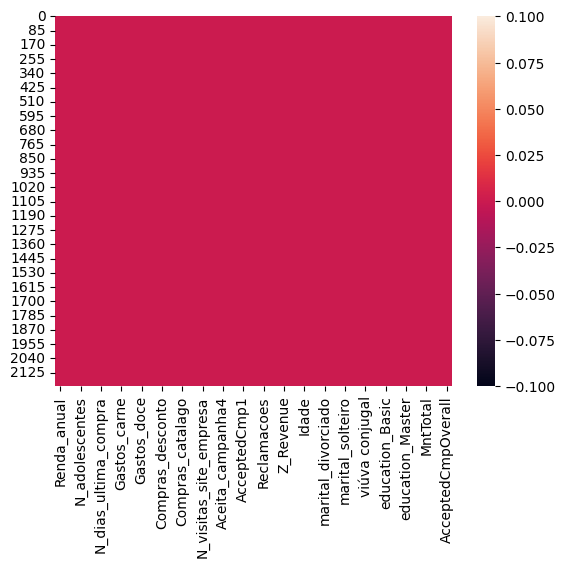

In [8]:
sns.heatmap(ifood_df.isnull())

In [9]:
ifood_df.isnull().sum()

Renda_anual               0
N_criancas                0
N_adolescentes            0
Recency                   0
N_dias_ultima_compra      0
Gastos_Frutas             0
Gastos_carne              0
Gastos_peixe              0
Gastos_doce               0
Gastos_ouro               0
Compras_desconto          0
Compras_site_empresa      0
Compras_catalago          0
Compras_lojas             0
N_visitas_site_empresa    0
Aceita_campanha3          0
Aceita_campanha4          0
Aceita_campanha5          0
AcceptedCmp1              0
Aceita_campanha2          0
Reclamacoes               0
Curto_contato             0
Z_Revenue                 0
Oferta_ultima_campanha    0
Idade                     0
Cliente_Dias              0
marital_divorciado        0
marital_casado            0
marital_solteiro          0
casados juntos            0
viúva conjugal            0
education_2n Cycle        0
education_Basic           0
education_Graduation      0
education_Master          0
education_PhD       

In [10]:
ifood_df.duplicated().sum()

184

In [11]:


ifood_df.drop(['Recency', 'Curto_contato','Cliente_Dias', 'Z_Revenue', 'Oferta_ultima_campanha', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'], axis = 1, inplace=True)



In [12]:
ifood_df.drop_duplicates(keep=False, inplace=True)
ifood_df.shape

(1808, 31)

In [13]:
ifood_df.describe()

,Renda_anual,N_criancas,N_adolescentes,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,...,marital_divorciado,marital_casado,marital_solteiro,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
count,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,...,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000
mean,51738.756637,0.442478,0.509956,305.613385,26.530420,166.679204,37.631637,27.466814,43.563053,2.321903,...,0.107301,0.390487,0.222898,0.245022,0.034292,0.090708,0.024336,0.504425,0.165929,0.214602
std,20749.769213,0.535418,0.549599,336.207560,39.877971,220.993824,54.979831,42.023869,51.408877,1.878232,...,0.309581,0.487994,0.416306,0.430219,0.182029,0.287273,0.154134,0.500119,0.372120,0.410659
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35696.750000,0.000000,0.000000,23.750000,2.000000,16.000000,2.750000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51609.500000,0.000000,0.000000,179.000000,8.000000,69.000000,12.000000,8.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,68289.750000,1.000000,1.000000,507.000000,33.000000,226.000000,50.000000,34.000000,56.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,113734.000000,2.000000,2.000000,1493.000000,197.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 03 - Visualização dos dados

/home/max/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/max/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/max/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

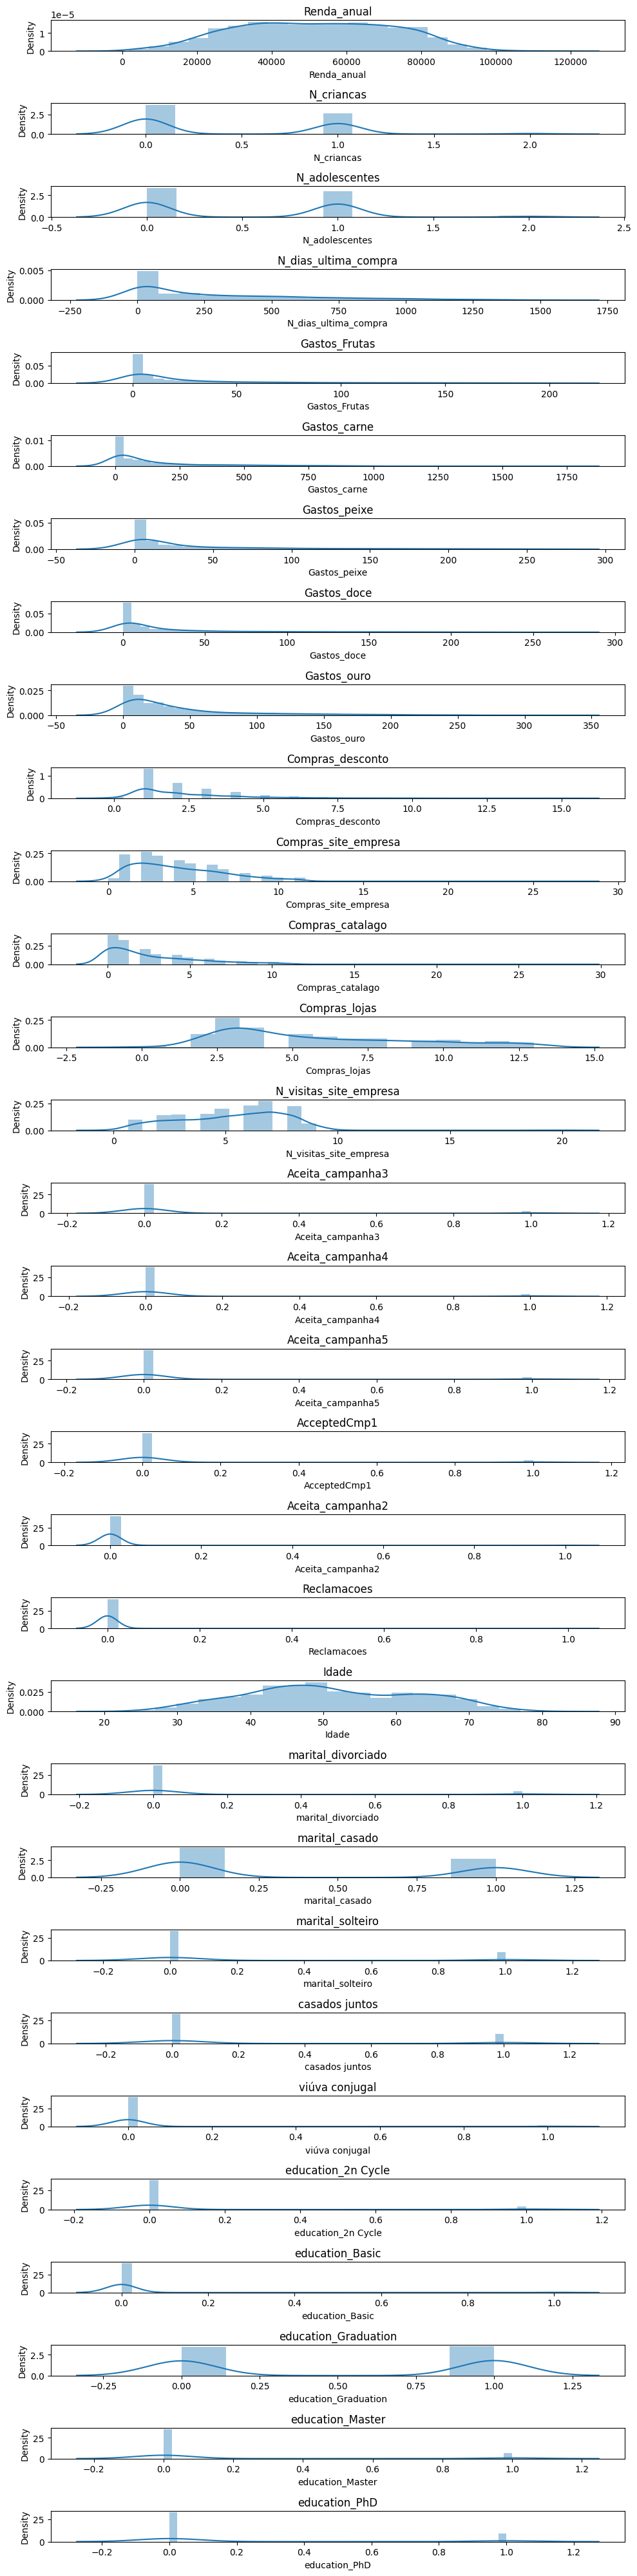

In [14]:
plt.figure(figsize=(10,50))
for i in range(len(ifood_df.columns)):
  plt.subplot(39, 1, i + 1)
  sns.distplot(ifood_df[ifood_df.columns[i]], kde = True)
  plt.title(ifood_df.columns[i])
plt.tight_layout();

In [15]:
correlations = ifood_df.corr()

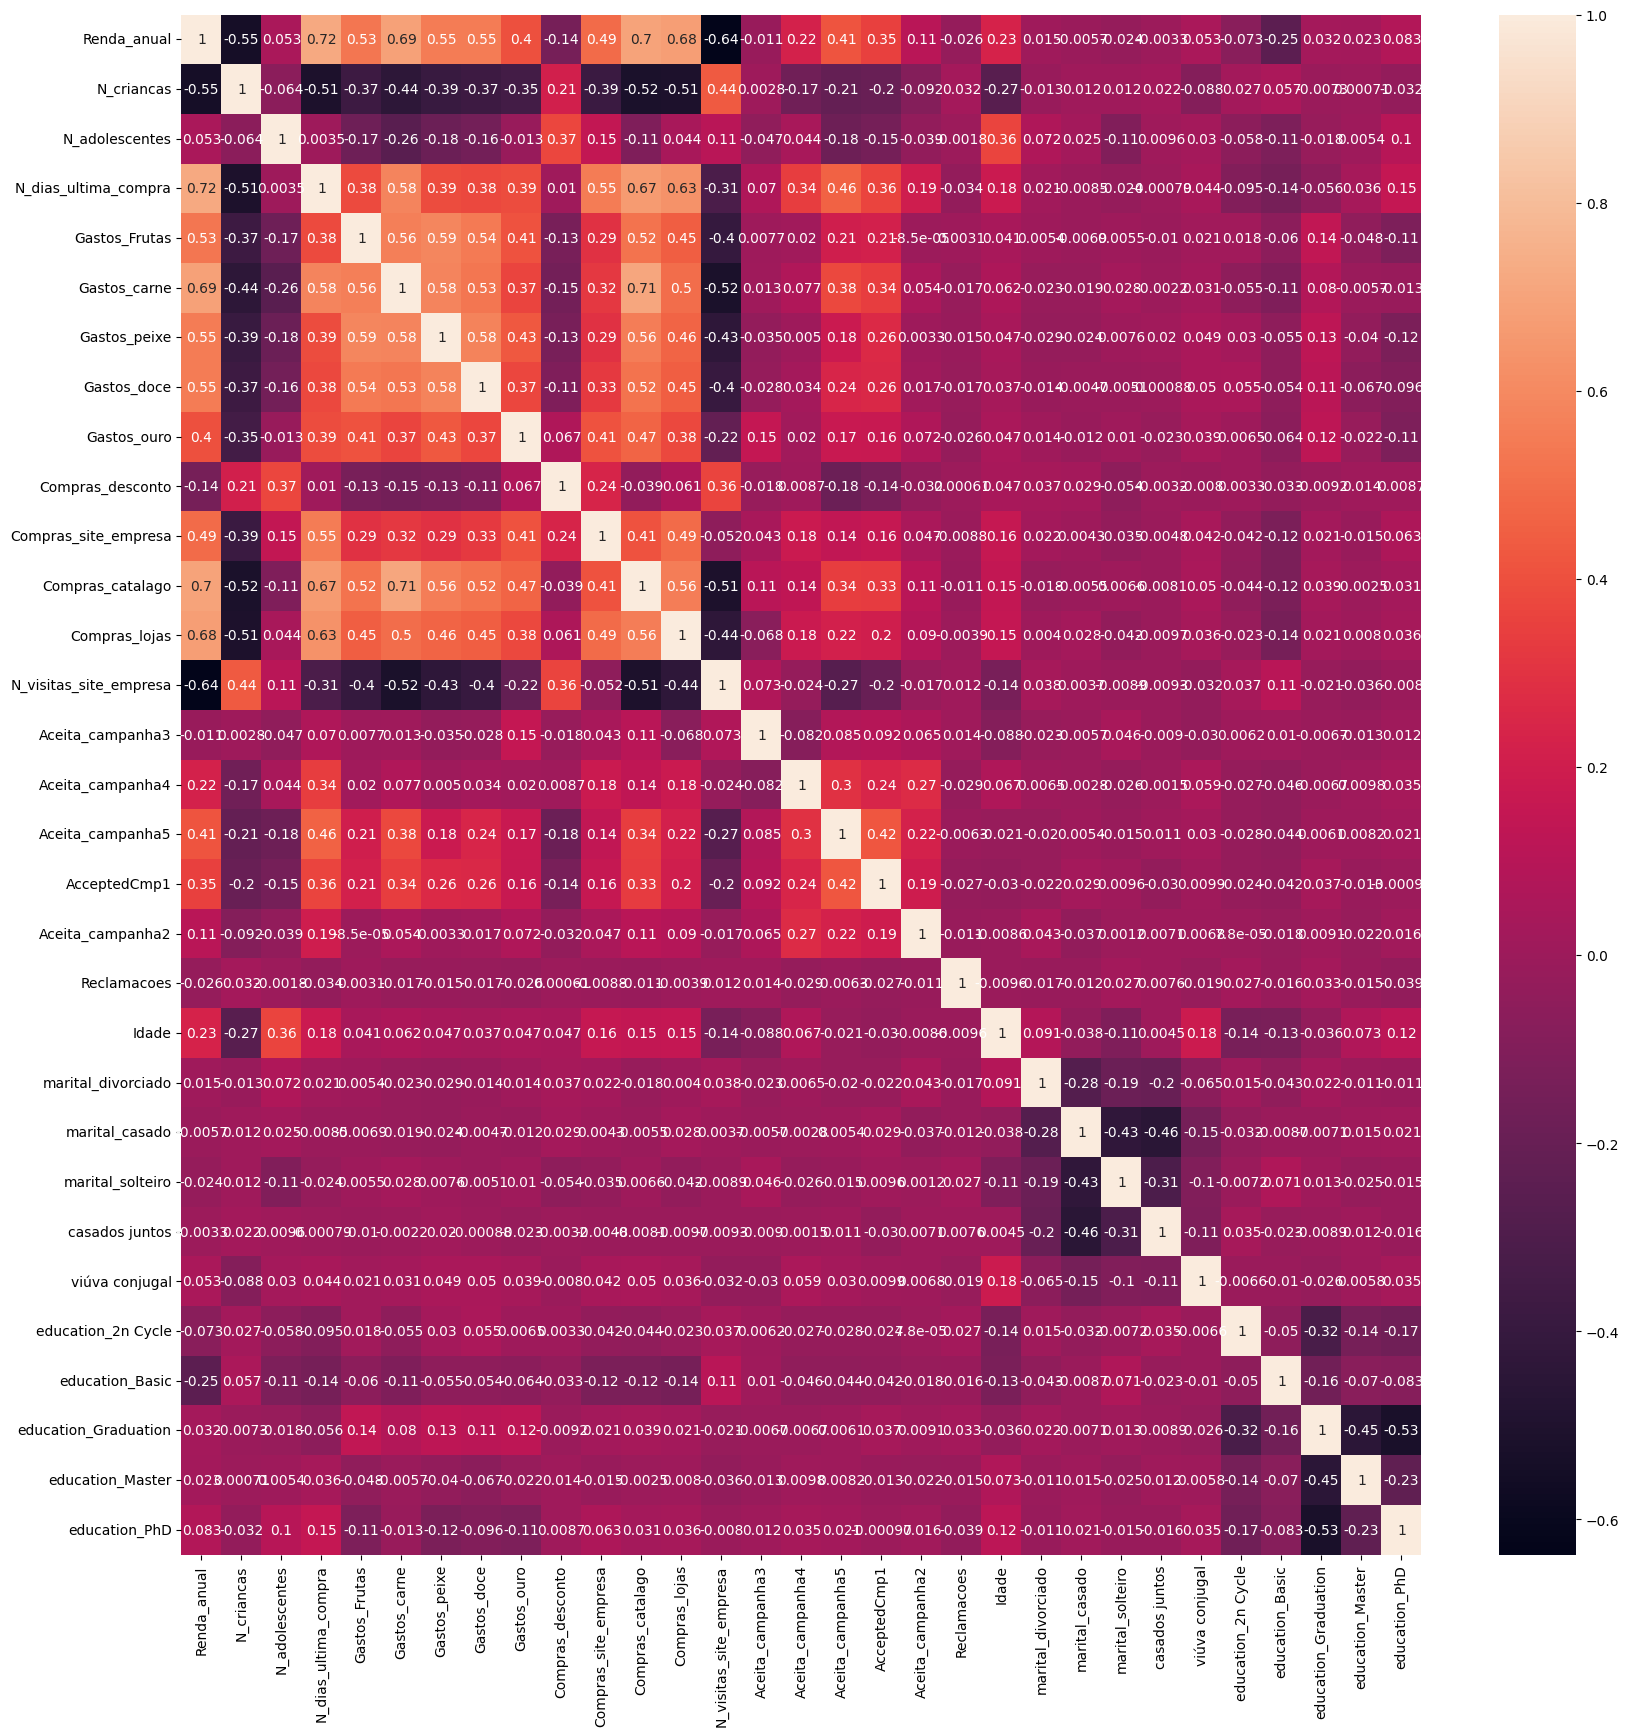

In [16]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

In [17]:
scaler = StandardScaler()
ifood_df_scaled = scaler.fit_transform(ifood_df)

In [18]:
ifood_df_scaled

array([[ 0.30848602, -0.82664392, -0.92812542, ...,  0.99118926,
        -0.44602578, -0.5227231 ],
       [-0.26006309,  1.04157134,  0.89188625, ...,  0.99118926,
        -0.44602578, -0.5227231 ],
       [ 0.9580705 , -0.82664392, -0.92812542, ...,  0.99118926,
        -0.44602578, -0.5227231 ],
       ...,
       [ 0.25271094, -0.82664392, -0.92812542, ...,  0.99118926,
        -0.44602578, -0.5227231 ],
       [ 0.84391718, -0.82664392,  0.89188625, ..., -1.00888906,
         2.2420229 , -0.5227231 ],
       [ 0.05448524,  1.04157134,  0.89188625, ..., -1.00888906,
        -0.44602578,  1.91305876]])

In [19]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(ifood_df_scaled)
  wcss_1.append(kmeans.inertia_)

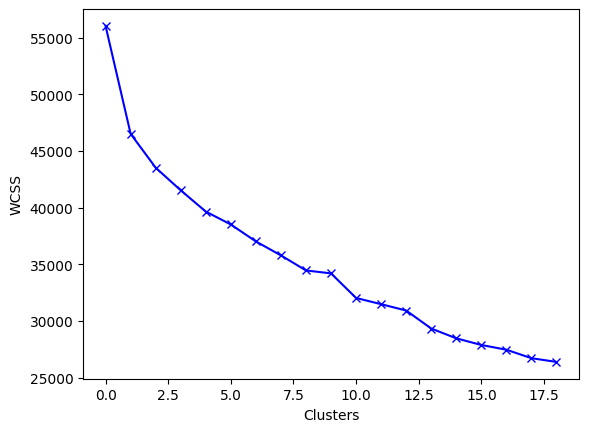

In [20]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

# 04 -  Agrupamento com K-Means

In [21]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(ifood_df_scaled)
labels = kmeans.labels_

In [22]:
labels, len(labels)

(array([1, 0, 1, ..., 3, 3, 0], dtype=int32), 1808)

In [23]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([788, 372, 137, 511]))

In [24]:
kmeans.cluster_centers_

array([[-8.80976490e-01,  7.33363236e-01, -1.70557111e-01,
        -8.00187734e-01, -5.44322456e-01, -6.51438776e-01,
        -5.53279961e-01, -5.32714201e-01, -5.45635475e-01,
        -1.48454823e-01, -7.36425724e-01, -7.60789239e-01,
        -8.28897893e-01,  4.99369971e-01,  7.73821595e-03,
        -2.65971703e-01, -2.78340048e-01, -2.63940301e-01,
        -1.10986617e-01,  2.75441873e-02, -3.15755019e-01,
        -4.32712581e-02, -1.74374612e-02,  6.81678202e-02,
         2.04254272e-02, -8.38369448e-02,  8.62633744e-02,
         1.96197375e-01, -2.91552677e-02, -2.30333446e-02,
        -7.76056009e-02],
       [ 1.00118564e+00, -7.21180153e-01, -4.53552486e-01,
         5.95241709e-01,  1.14929917e+00,  1.17489844e+00,
         1.24146474e+00,  1.11016948e+00,  6.37777274e-01,
        -4.33420041e-01,  4.28772784e-01,  1.05811443e+00,
         7.89127188e-01, -9.31088577e-01, -7.76903236e-02,
        -1.69020727e-01, -2.78340048e-01,  2.02520000e-01,
        -1.10986617e-01,  8.02

In [25]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [ifood_df.columns])
cluster_centers

,Renda_anual,N_criancas,N_adolescentes,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,...,marital_divorciado,marital_casado,marital_solteiro,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
0,-0.880976,0.733363,-0.170557,-0.800188,-0.544322,-0.651439,-0.553280,-0.532714,-0.545635,-0.148455,...,-0.043271,-0.017437,0.068168,0.020425,-0.083837,0.086263,0.196197,-0.029155,-0.023033,-0.077606
1,1.001186,-0.721180,-0.453552,0.595242,1.149299,1.174898,1.241465,1.110169,0.637777,-0.433420,...,-0.042698,-0.062050,0.090955,-0.019677,0.077455,0.002402,-0.140489,0.227718,-0.099181,-0.136403
2,1.447600,-0.758461,-0.635861,1.670767,0.709172,1.318265,0.630726,0.847345,0.605144,-0.657349,...,-0.063683,0.067378,-0.097111,0.024302,0.092334,-0.087100,-0.157935,0.013049,0.005252,0.099557
3,0.241580,-0.402548,0.763666,0.352687,-0.187416,-0.204170,-0.219667,-0.213876,0.214878,0.720688,...,0.114885,0.053997,-0.145298,-0.023689,0.048142,-0.111422,-0.157935,-0.124314,0.106313,0.192281


In [26]:
cluster_centers.shape

(4, 31)

In [27]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [ifood_df.columns])
cluster_centers

,Renda_anual,N_criancas,N_adolescentes,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,...,marital_divorciado,marital_casado,marital_solteiro,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
0,33463.753807,0.835025,0.416244,36.658629,4.829949,22.755076,7.220812,5.086294,15.520305,2.043147,...,0.093909,0.381980,0.251269,0.253807,0.019036,0.115482,5.456853e-02,0.489848,0.157360,0.182741
1,72507.381720,0.056452,0.260753,505.682796,72.349462,426.252688,105.868280,74.107527,76.341398,1.508065,...,0.094086,0.360215,0.260753,0.236559,0.048387,0.091398,2.688172e-03,0.618280,0.129032,0.158602
2,81767.810219,0.036496,0.160584,867.182482,54.802920,457.927007,72.299270,63.065693,74.664234,1.087591,...,0.087591,0.423358,0.182482,0.255474,0.051095,0.065693,-6.938894e-18,0.510949,0.167883,0.255474
3,56750.093933,0.227006,0.929550,424.156556,19.058708,121.571429,25.557730,18.481409,54.606654,3.675147,...,0.142857,0.416830,0.162427,0.234834,0.043053,0.058708,2.081668e-17,0.442270,0.205479,0.293542


In [28]:
cluster_centers.shape

(4, 31)

In [29]:
labels_df = pd.DataFrame({'cluster': labels})

In [30]:
labels_df

,cluster
0,1
1,0
2,1
3,0
4,3
...,...
1803,0
1804,1
1805,3
1806,3


In [50]:
ifood_df_cluster = ifood_df.join(labels_df)
ifood_df_cluster.head()

,Renda_anual,N_criancas,N_adolescentes,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,...,marital_casado,marital_solteiro,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,cluster
0,58138.0,0,0,635,88,546,172,88,88,3,...,0,1,0,0,0,0,1,0,0,1.0
1,46344.0,1,1,11,1,6,2,1,6,2,...,0,1,0,0,0,0,1,0,0,0.0
2,71613.0,0,0,426,49,127,111,21,42,1,...,0,0,1,0,0,0,1,0,0,1.0
3,26646.0,1,0,11,4,20,10,3,5,2,...,0,0,1,0,0,0,1,0,0,0.0
4,58293.0,1,0,173,43,118,46,27,15,5,...,1,0,0,0,0,0,0,0,1,3.0


In [32]:
ifood_df_cluster.shape, ifood_df.shape

((1808, 32), (1808, 31))

/tmp/ipykernel_13034/4254491541.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(35,5))


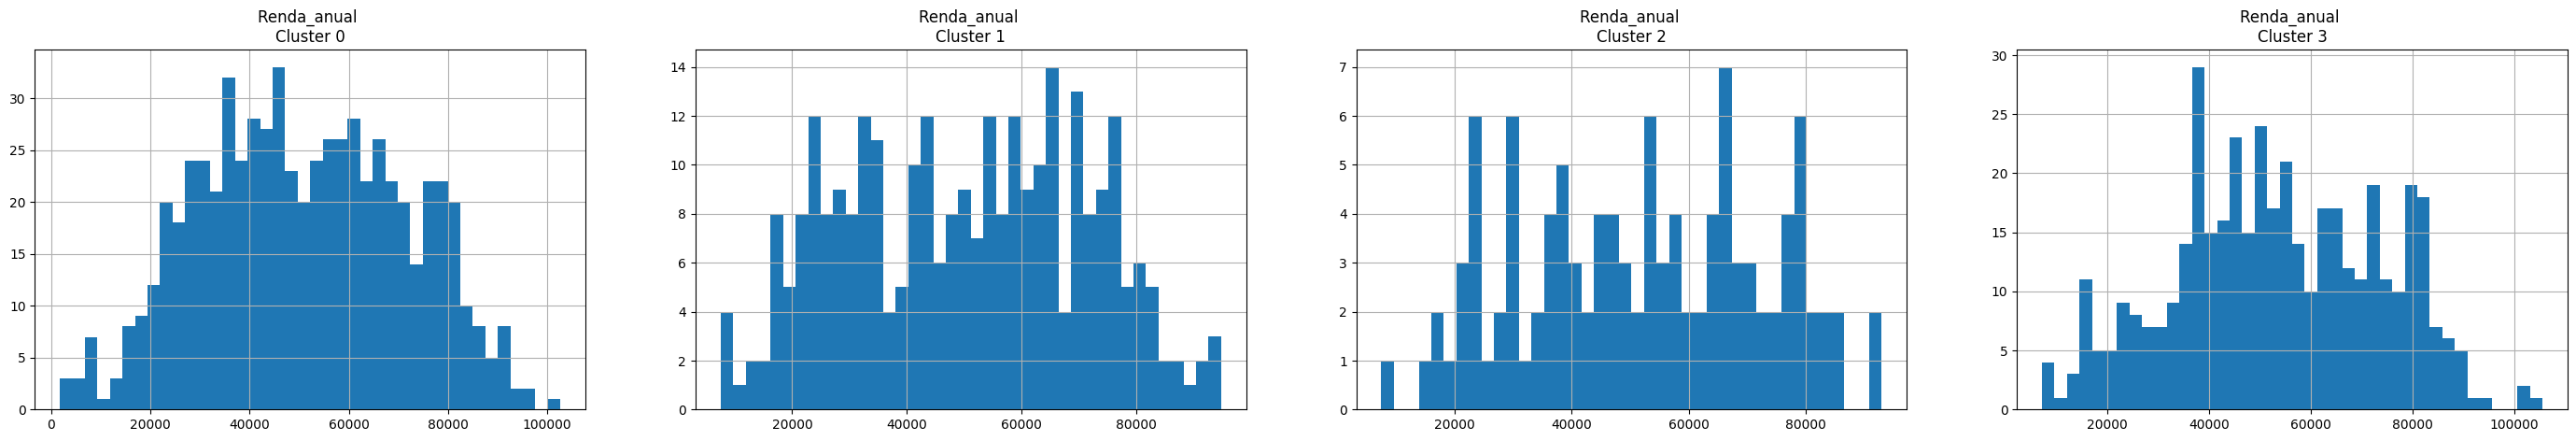

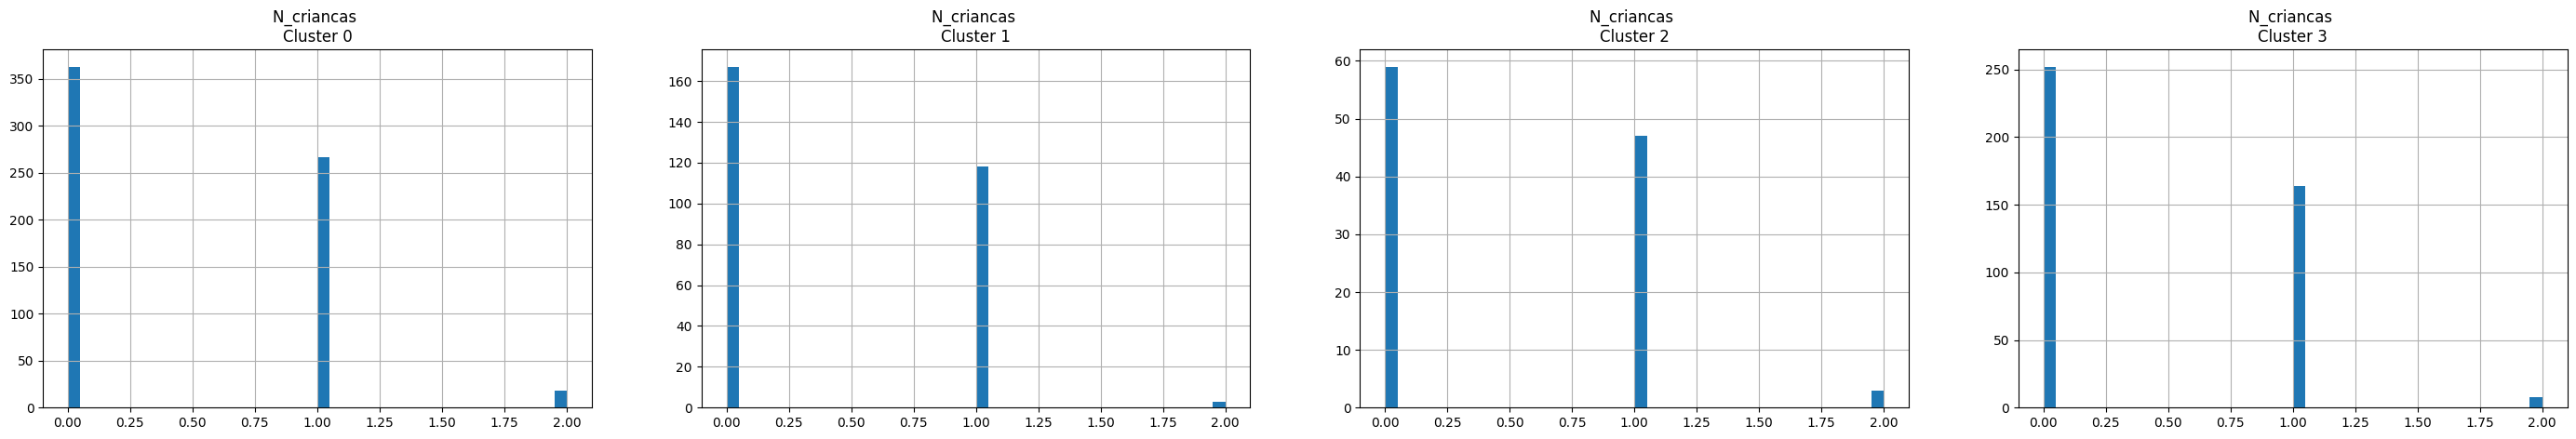

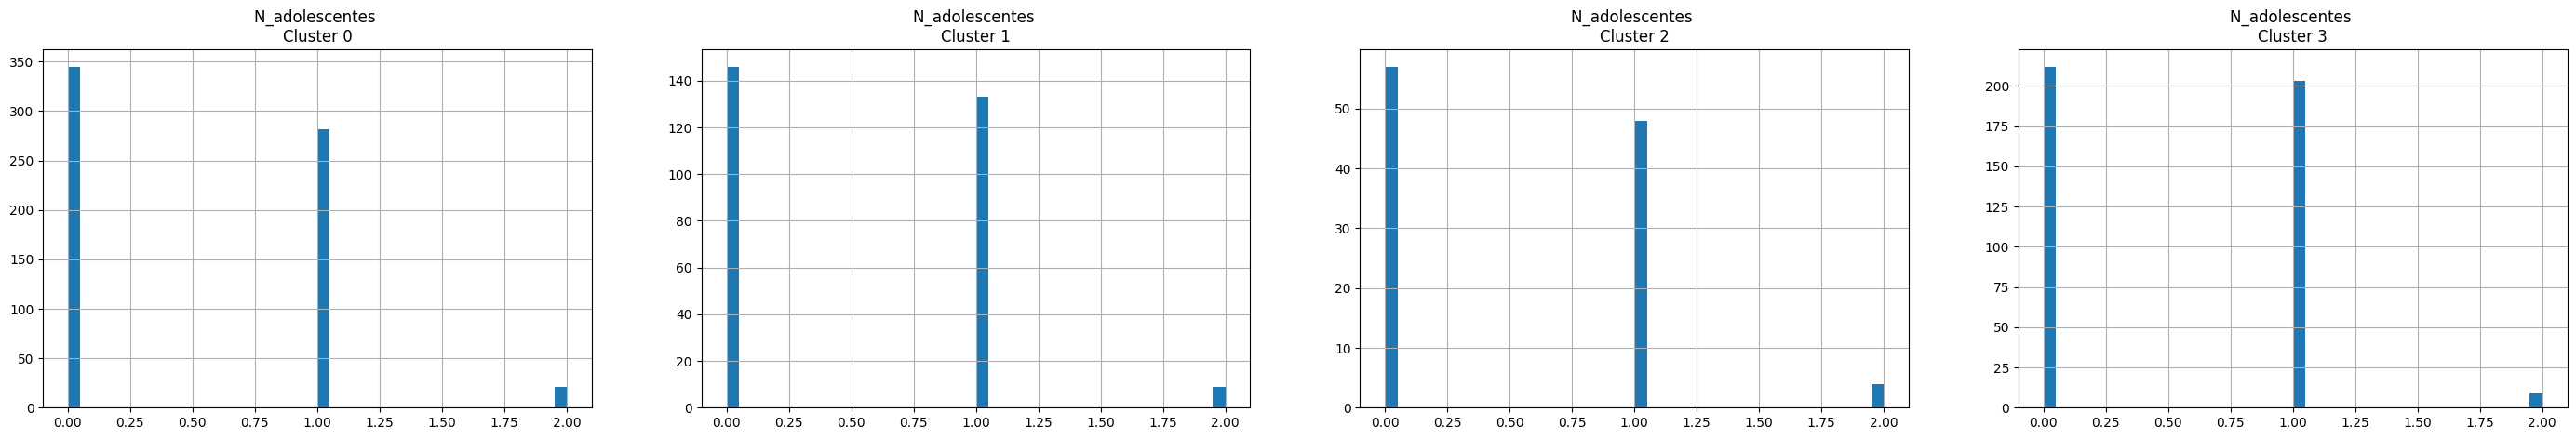

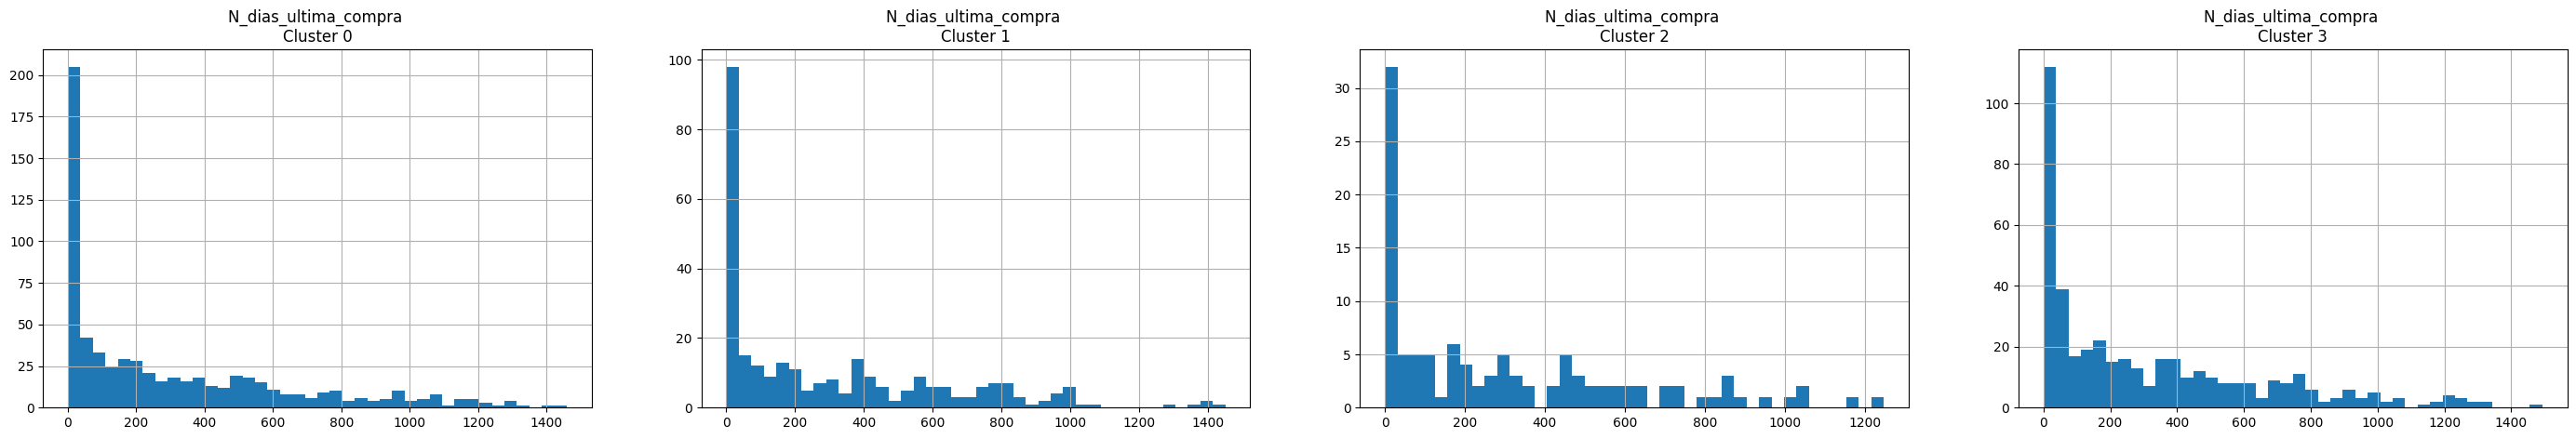

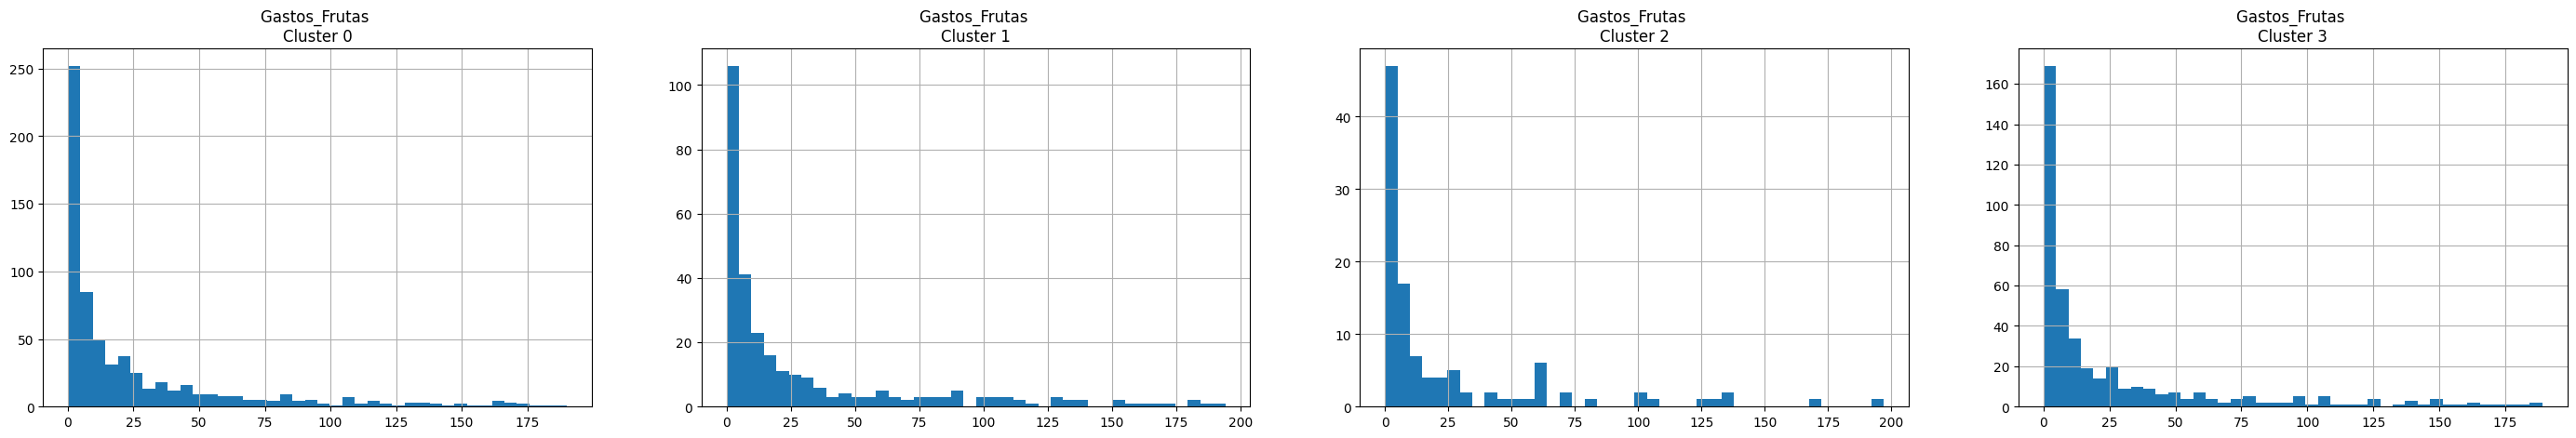

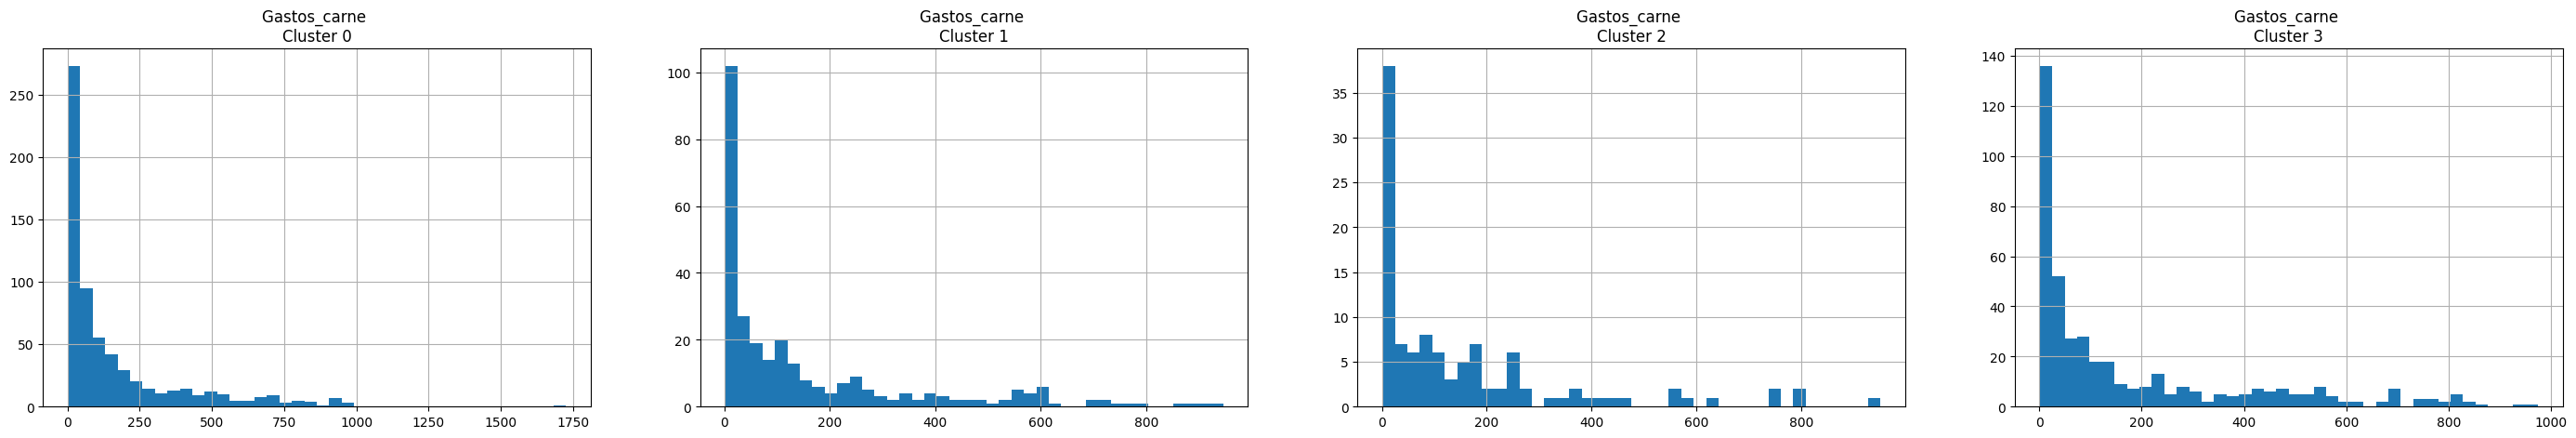

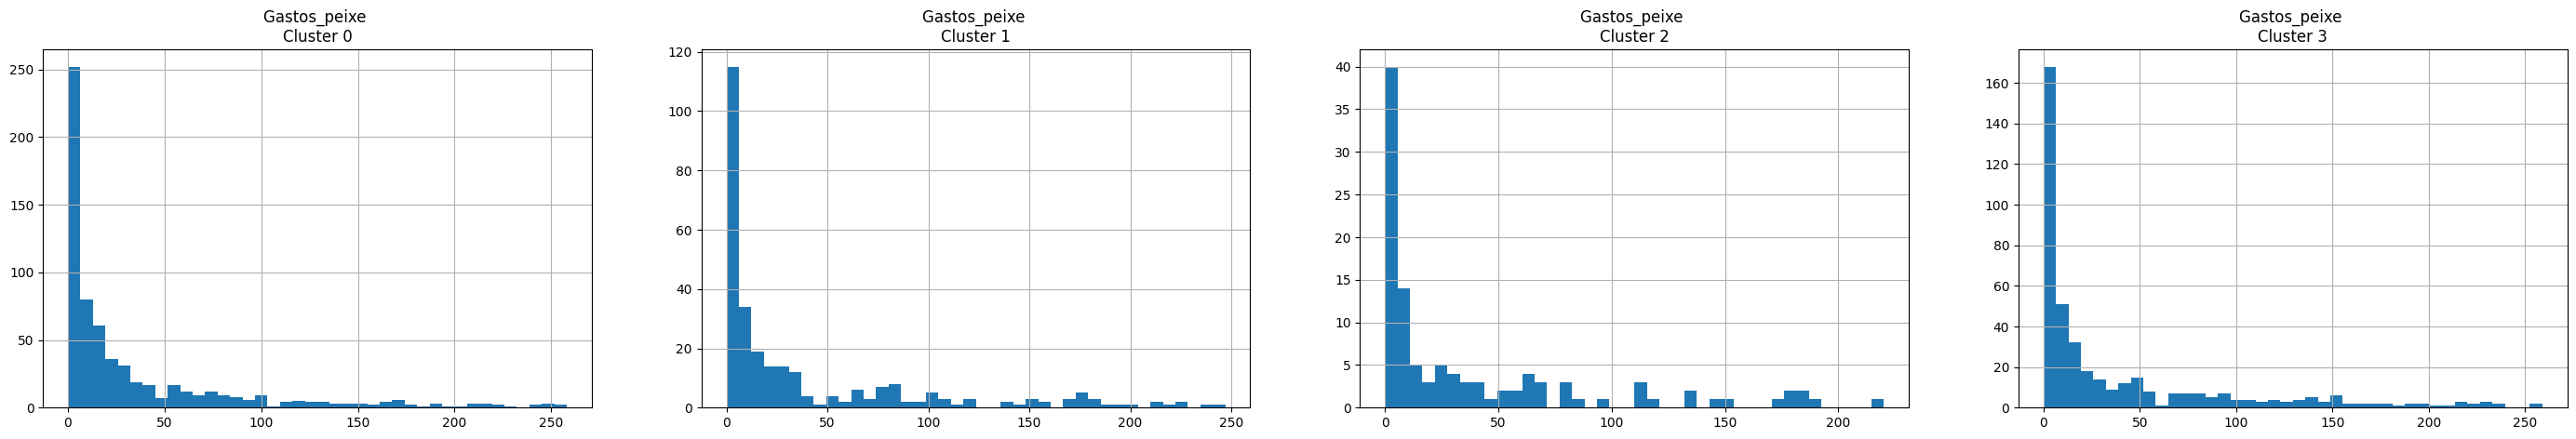

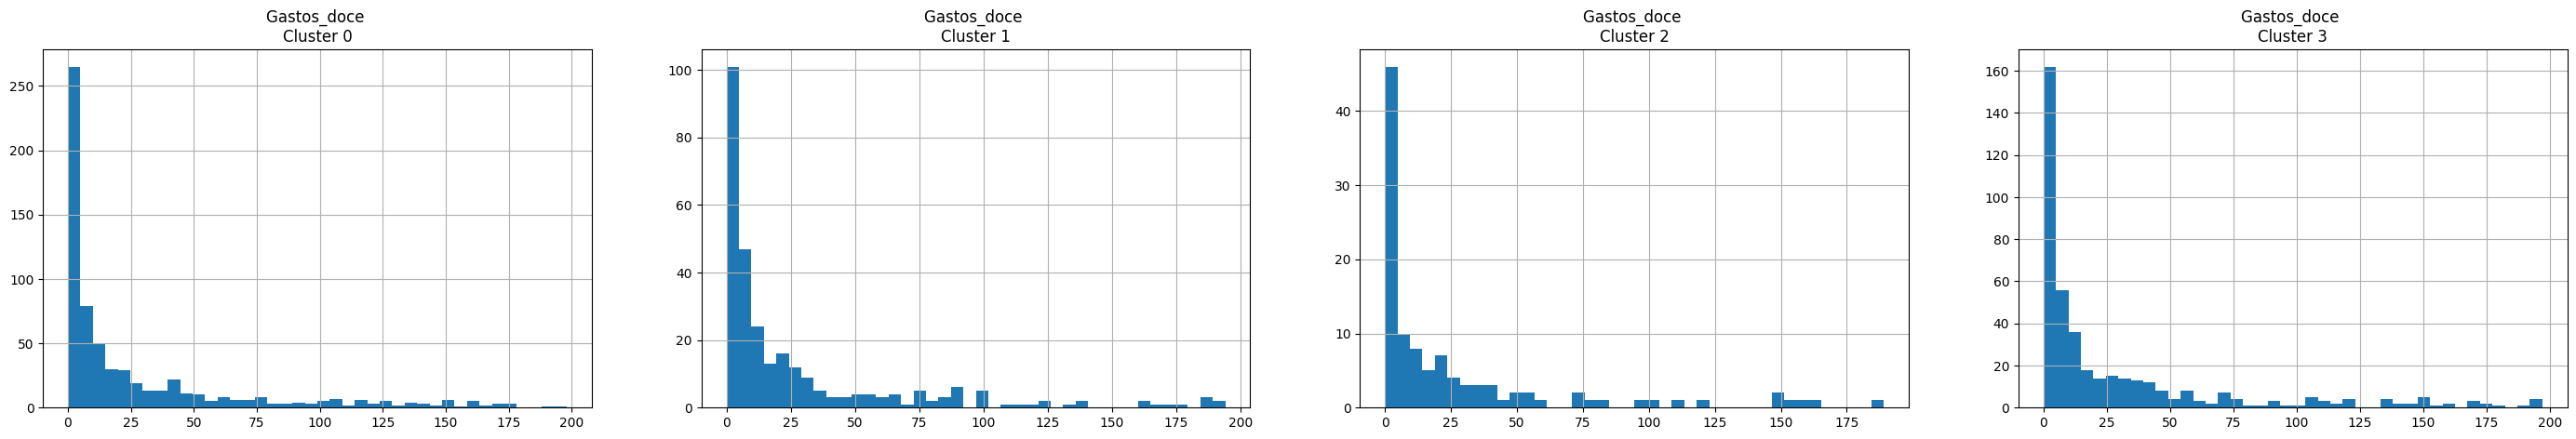

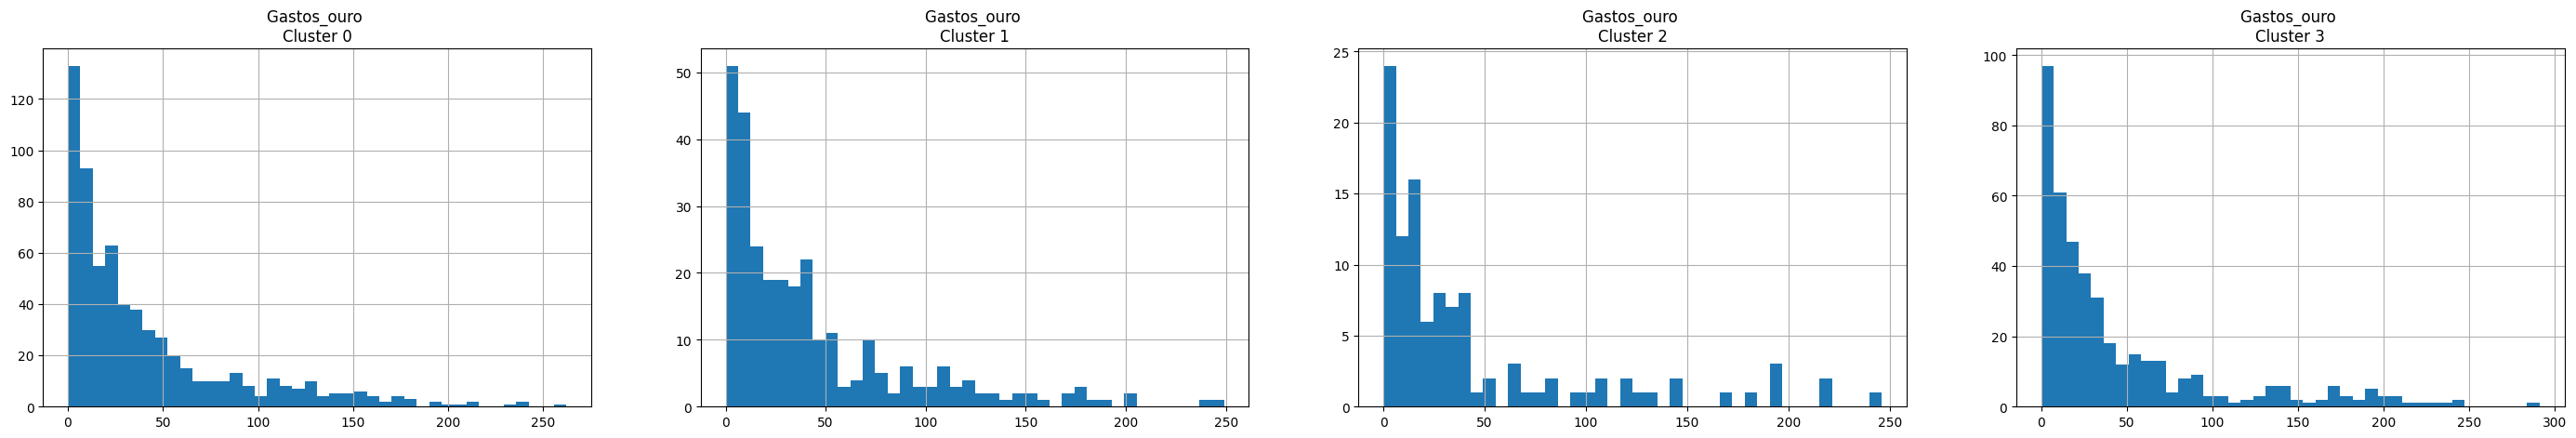

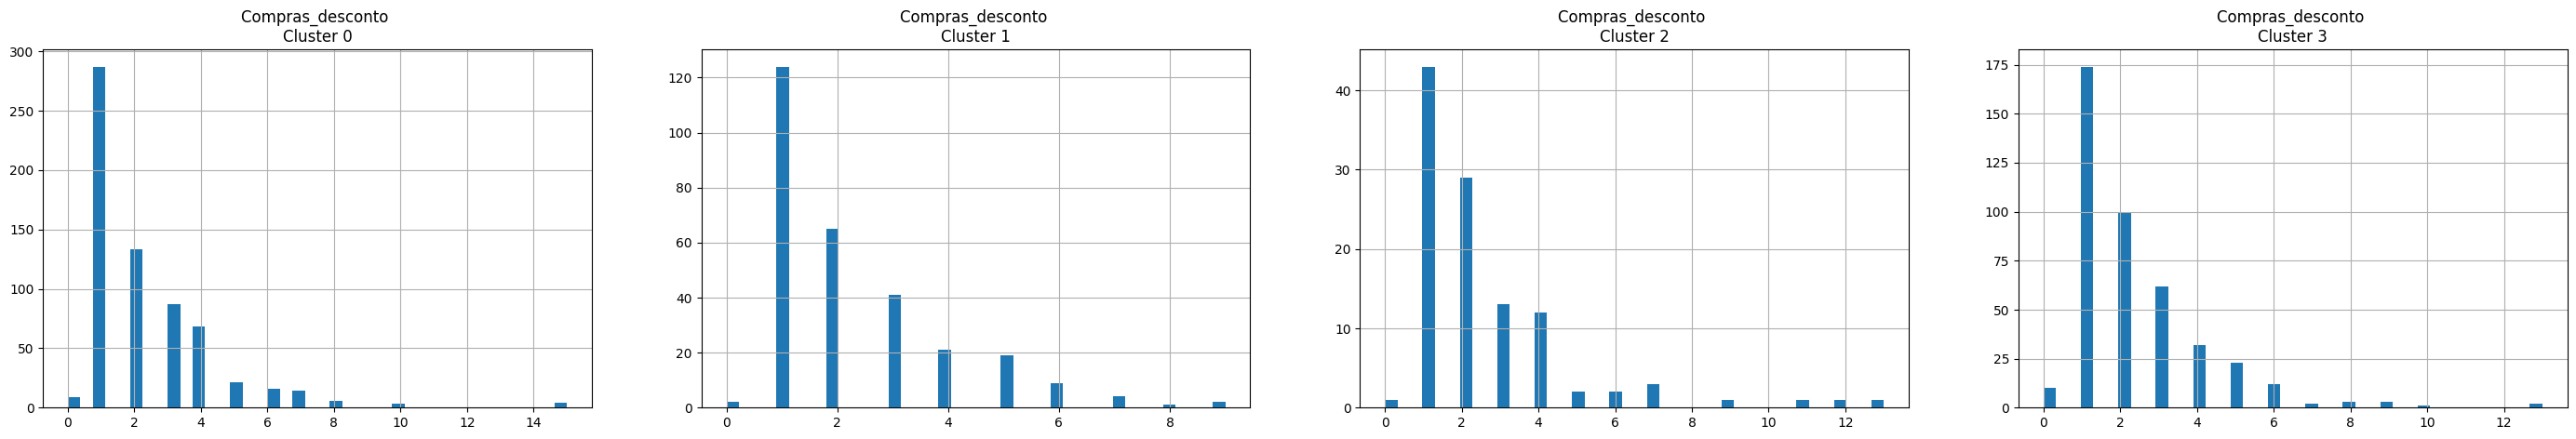

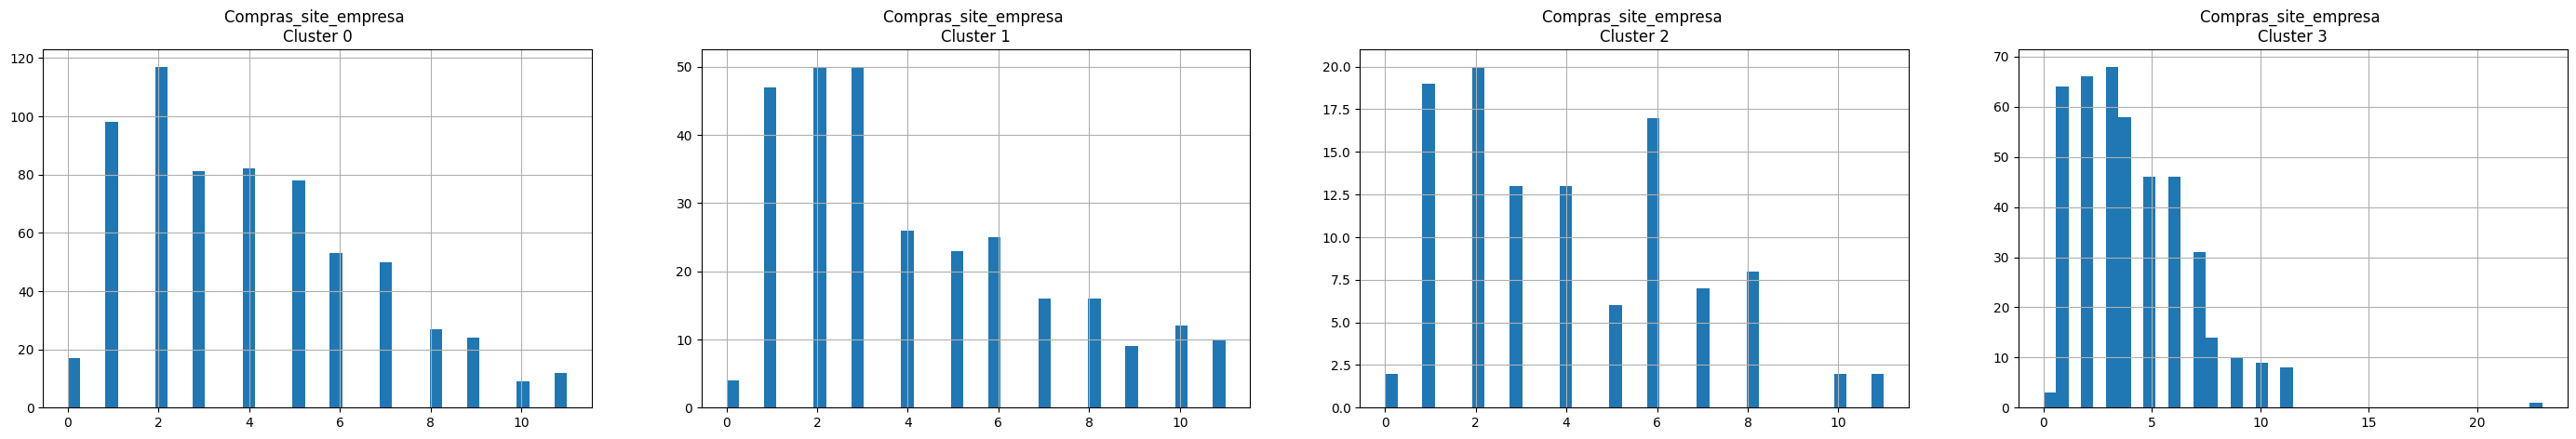

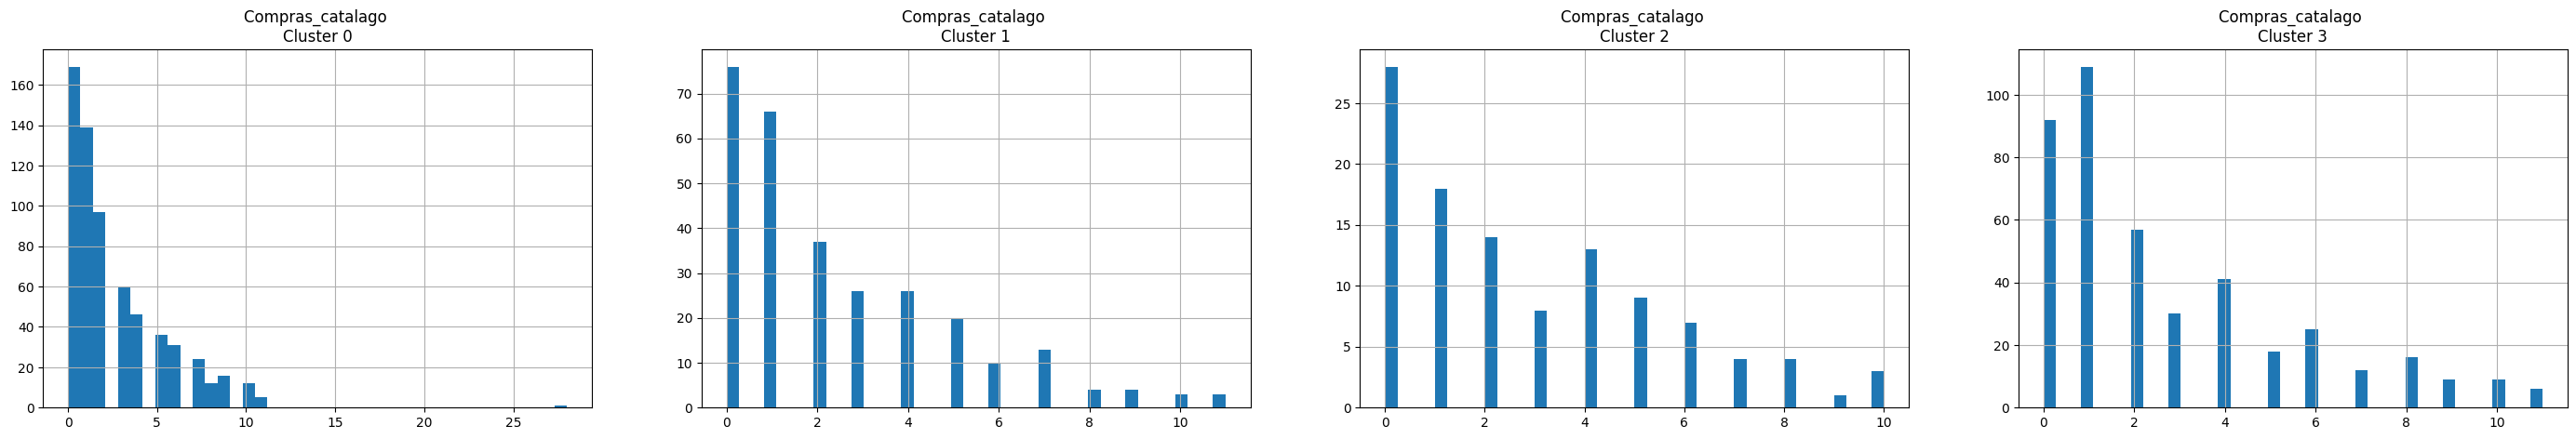

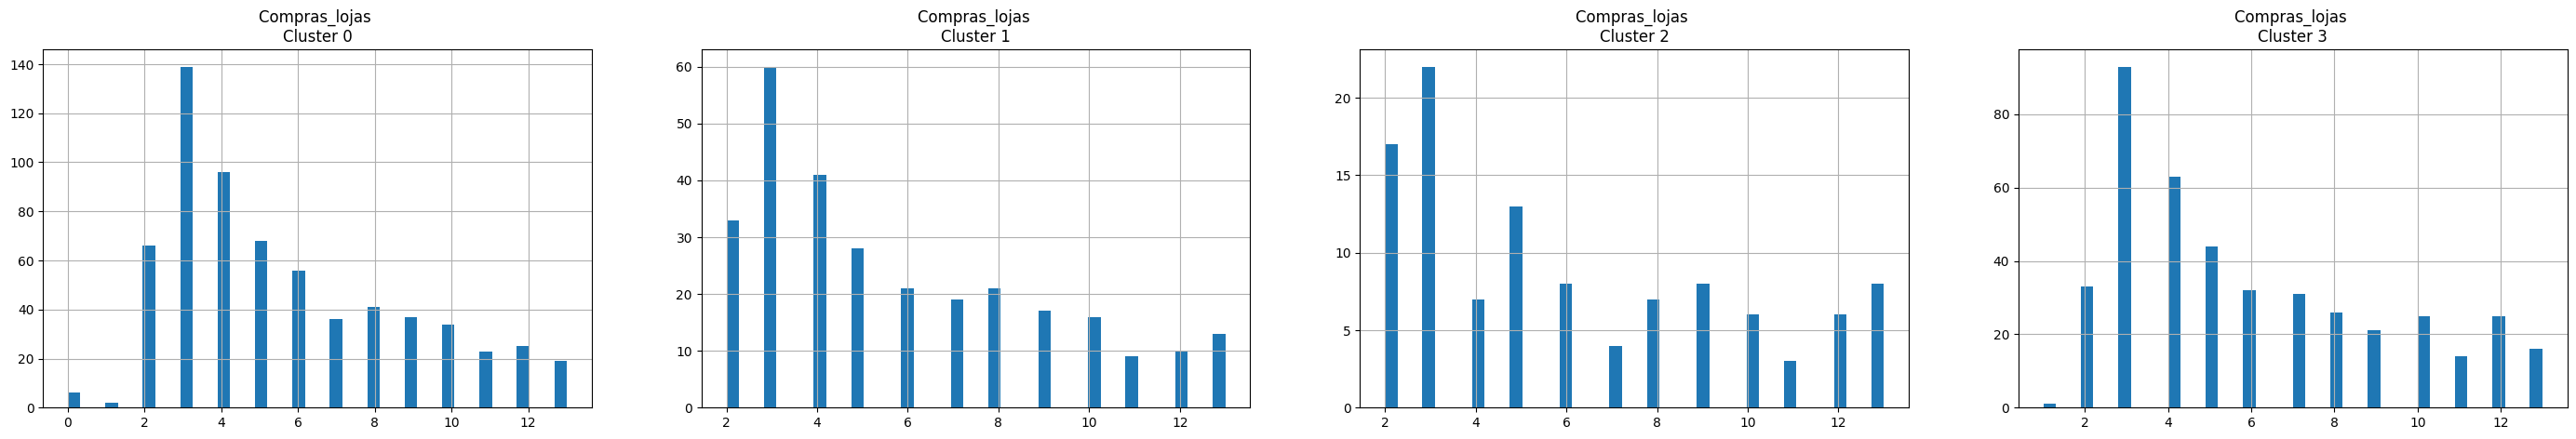

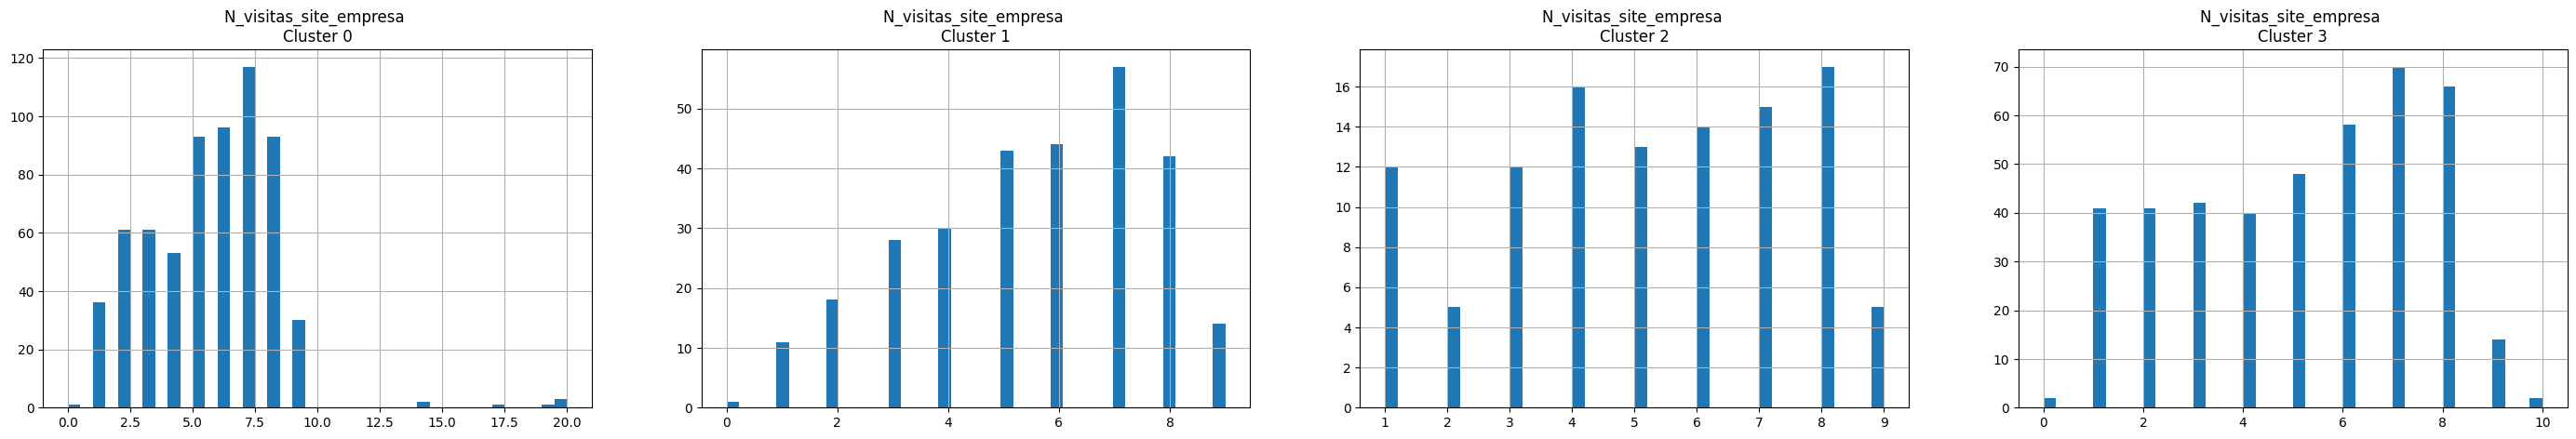

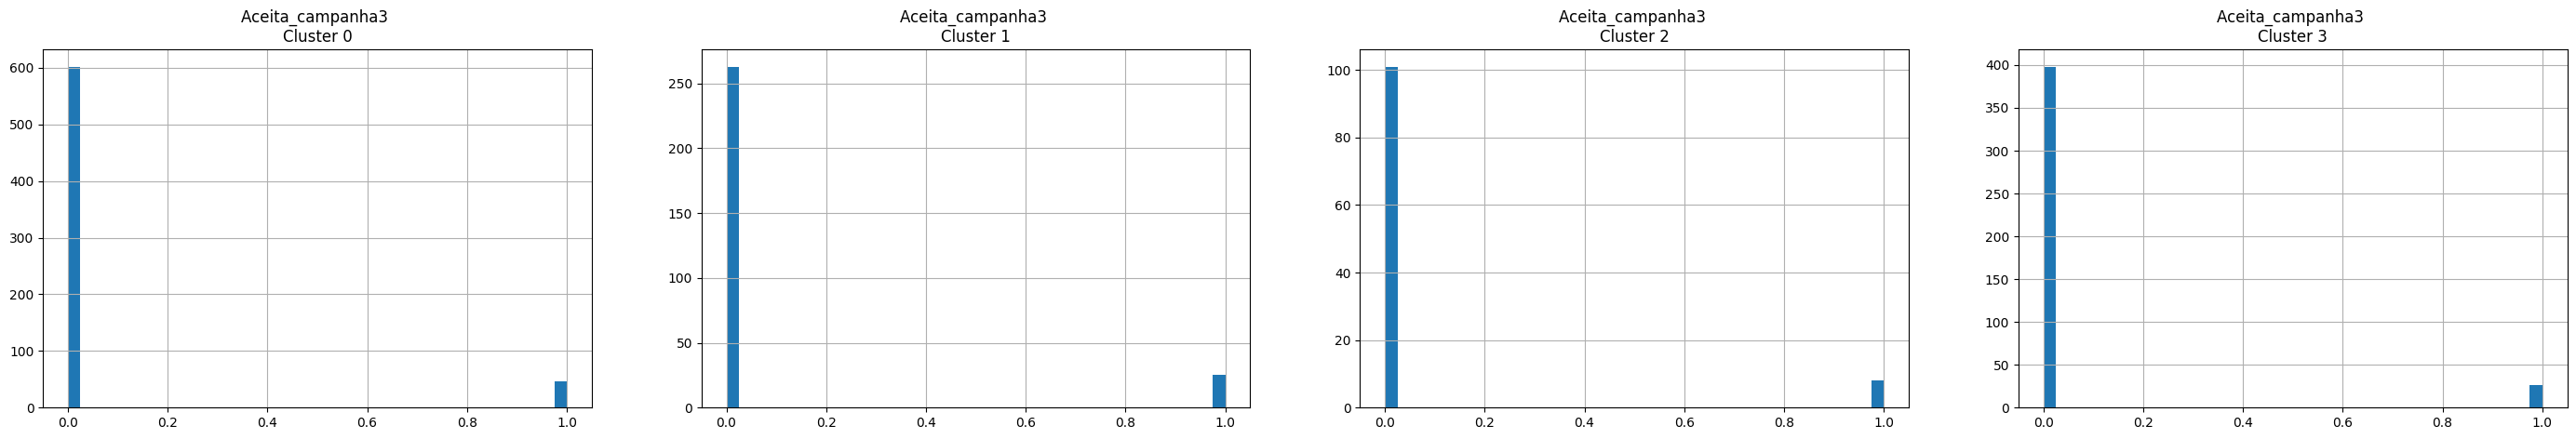

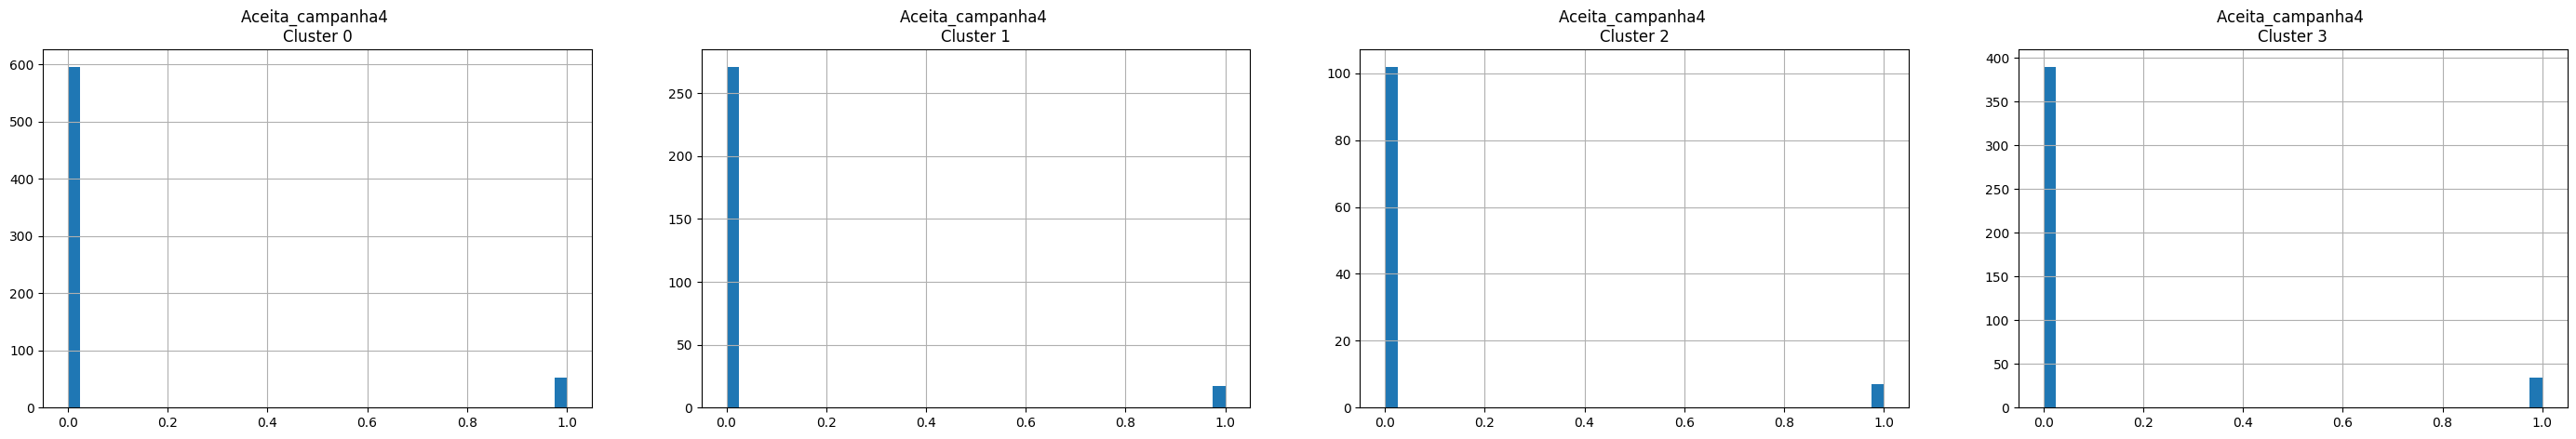

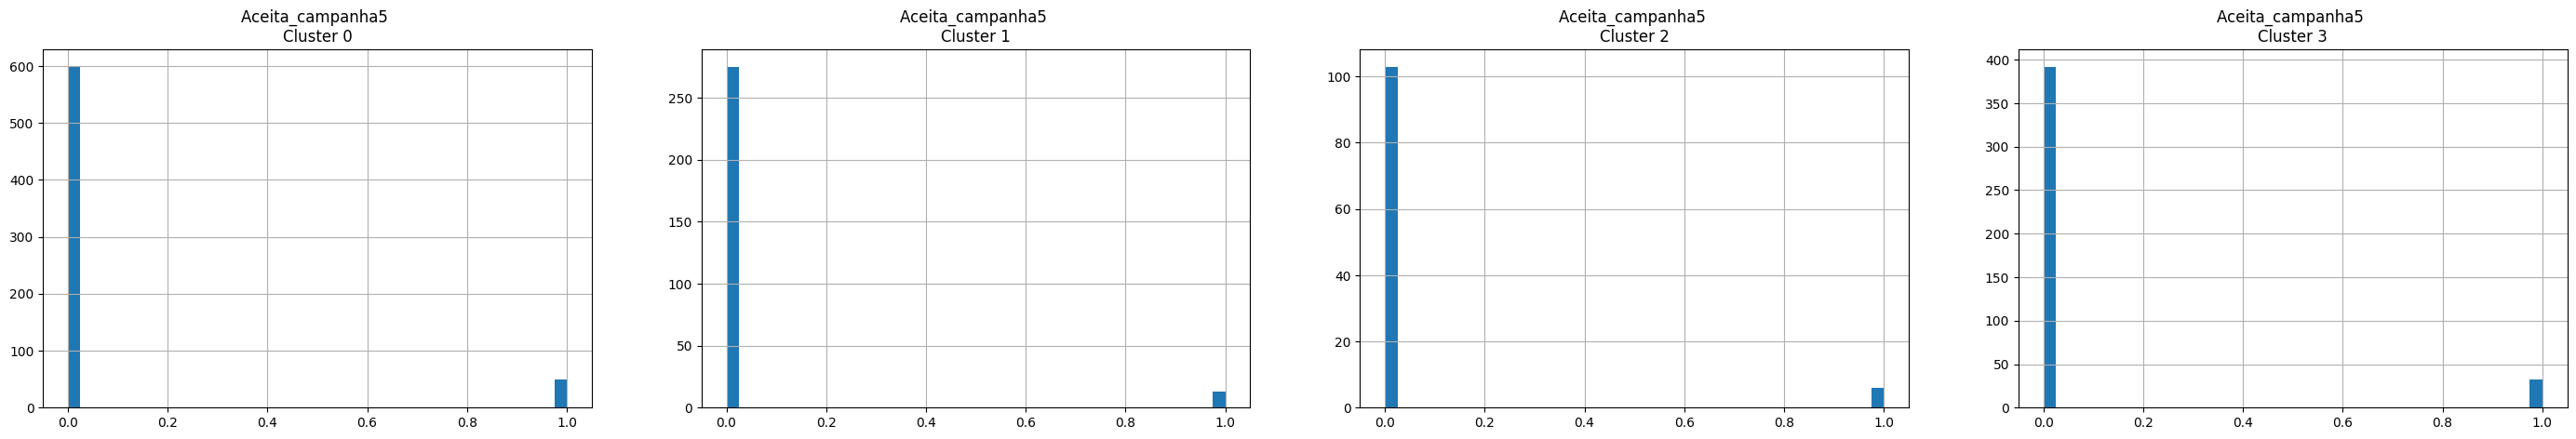

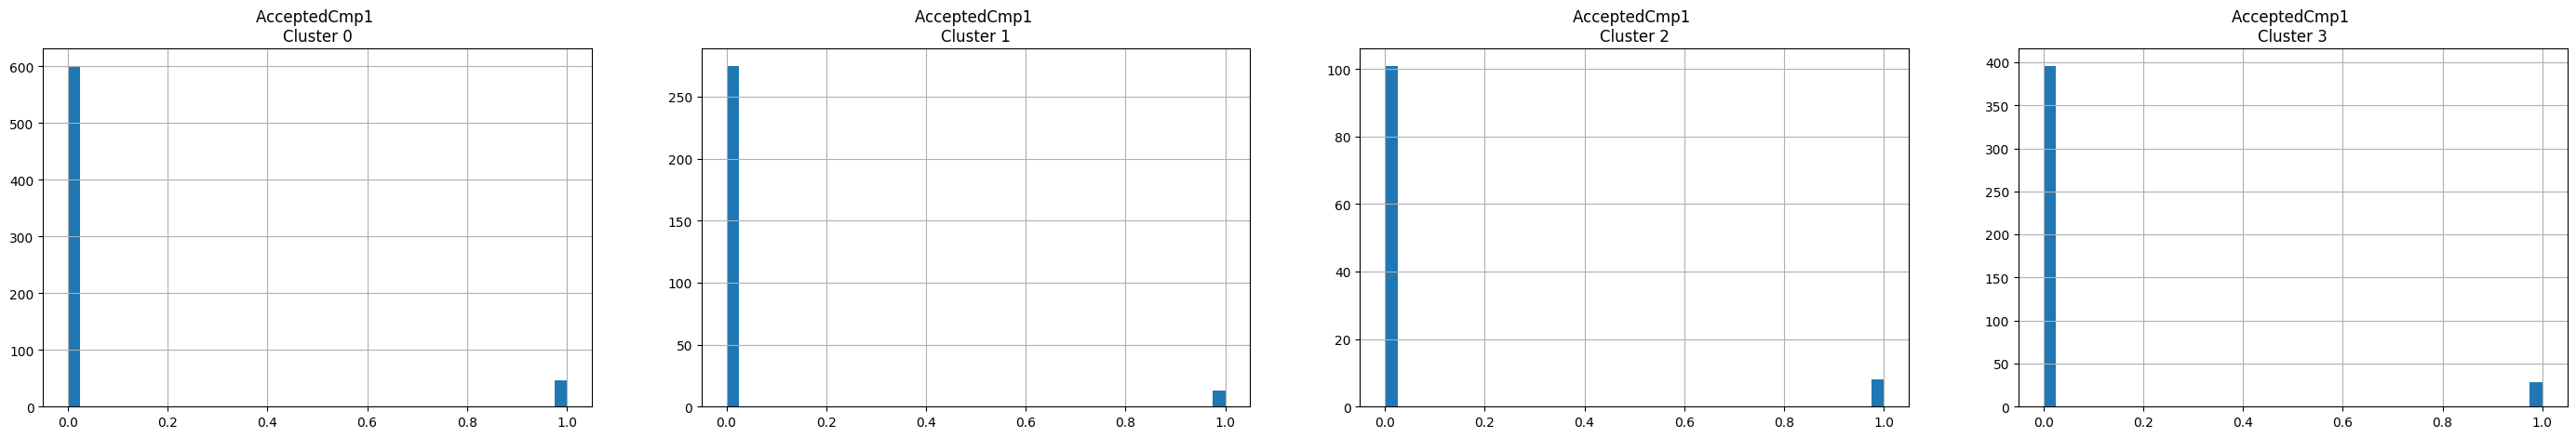

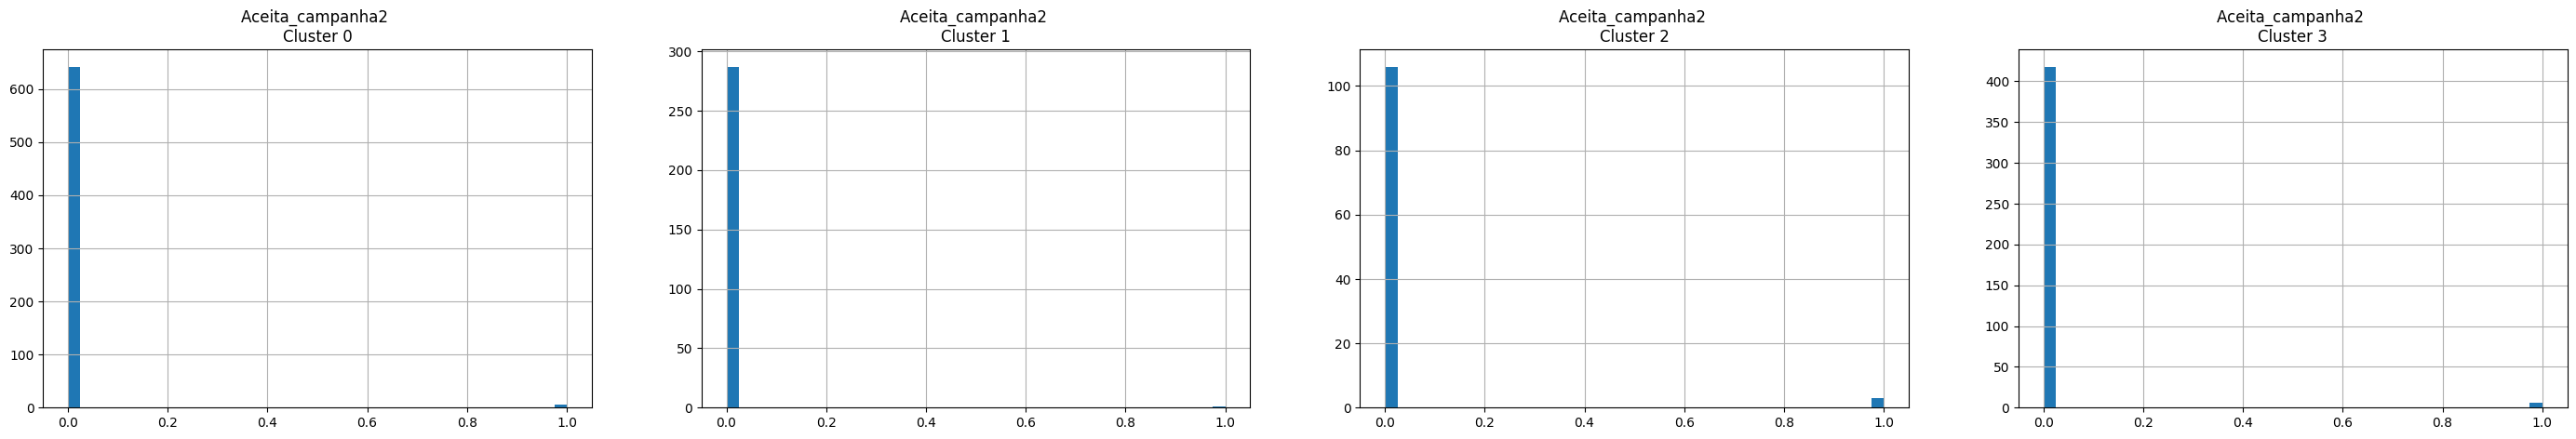

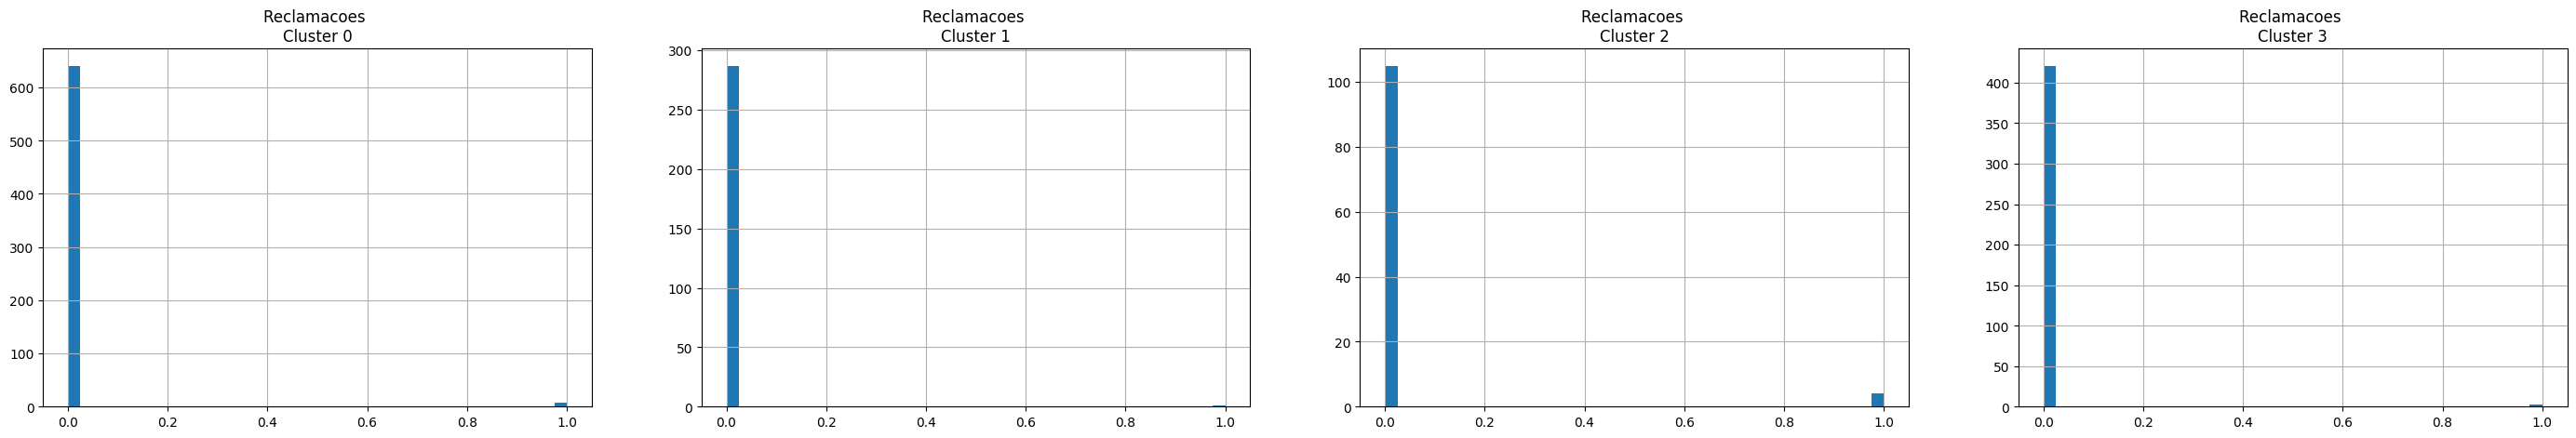

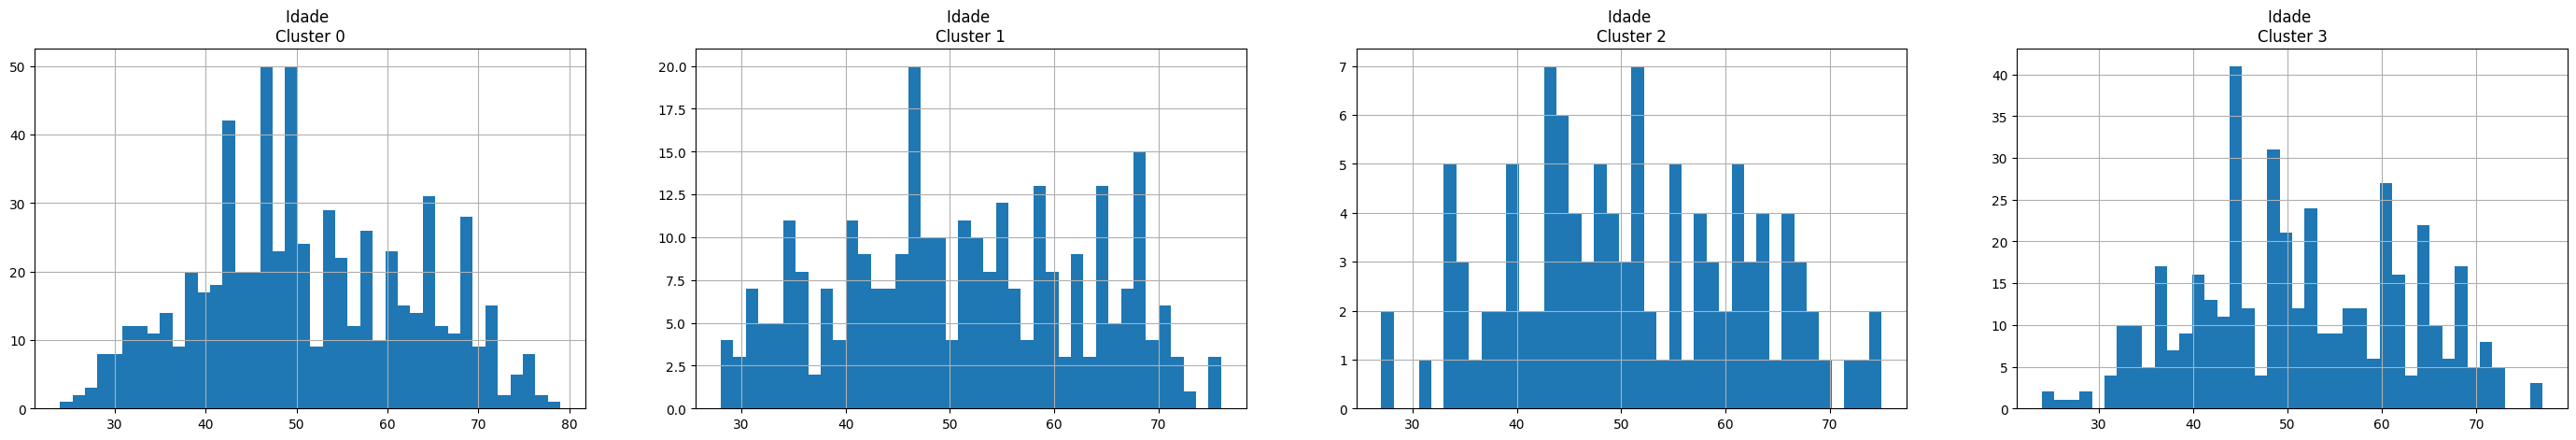

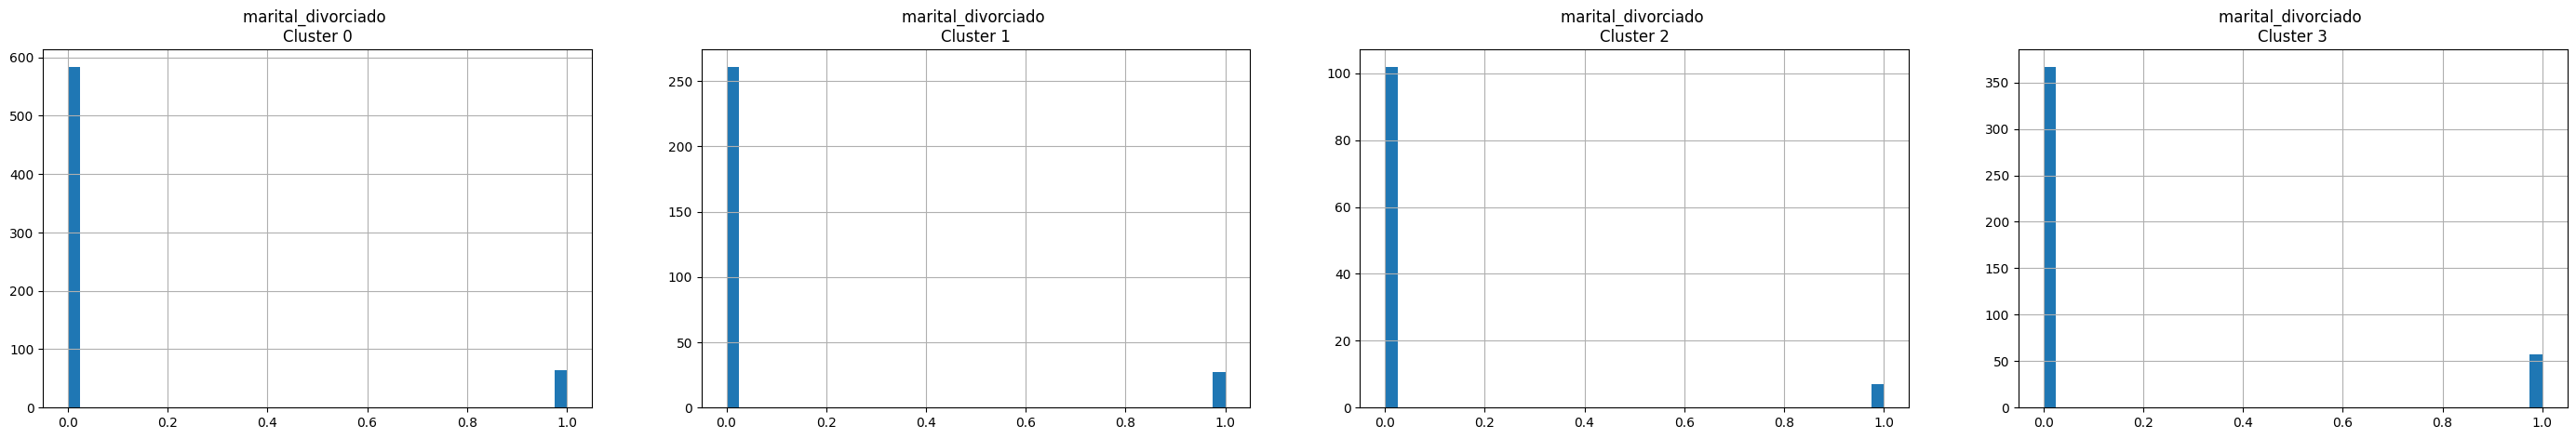

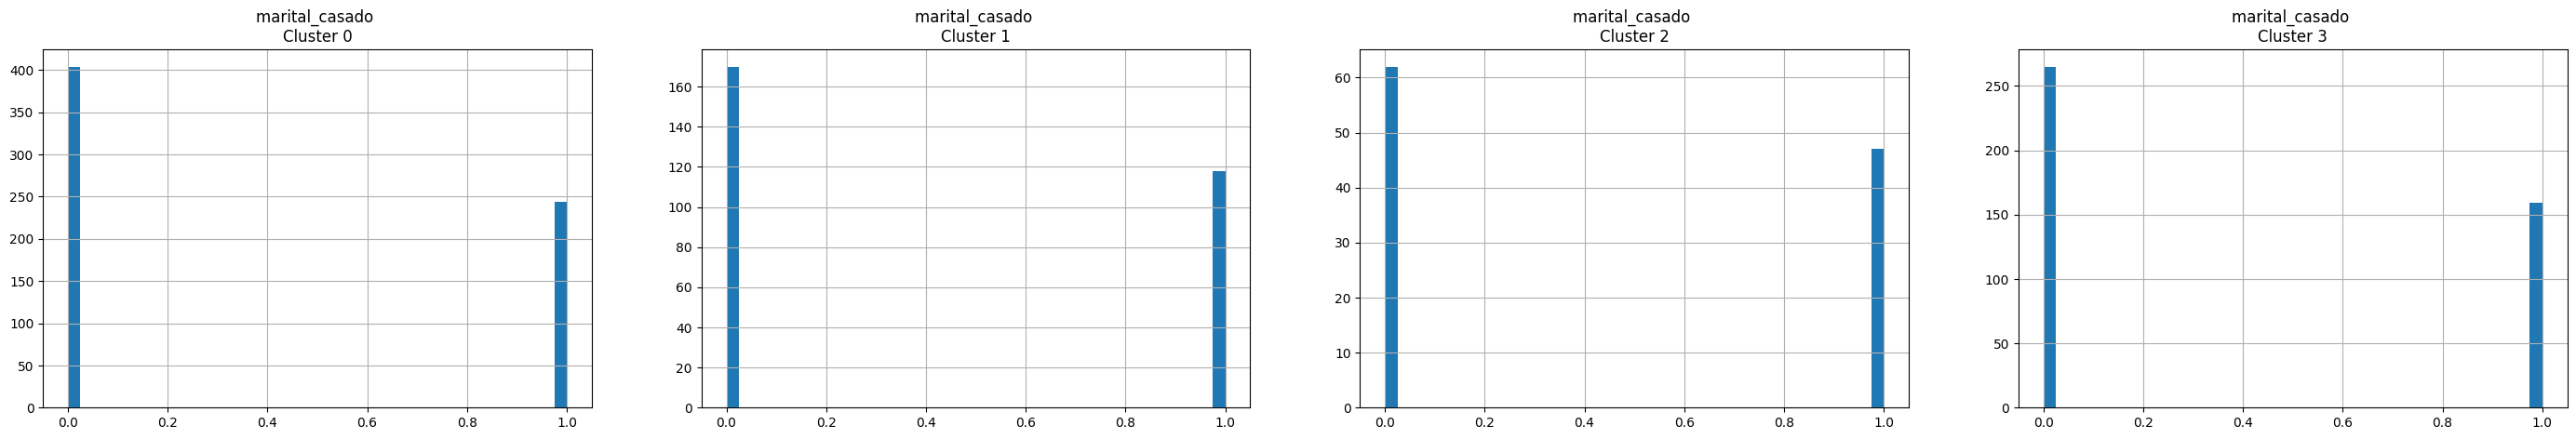

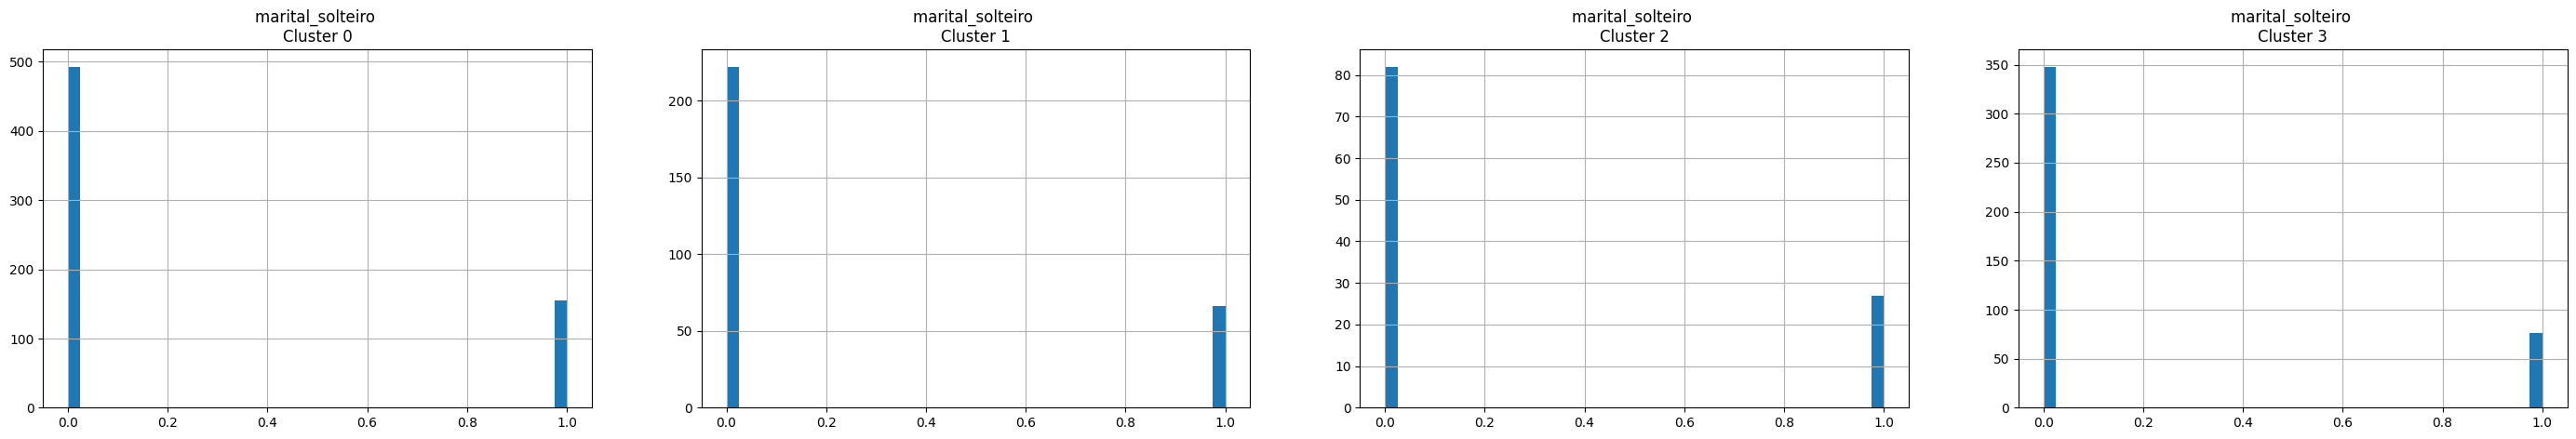

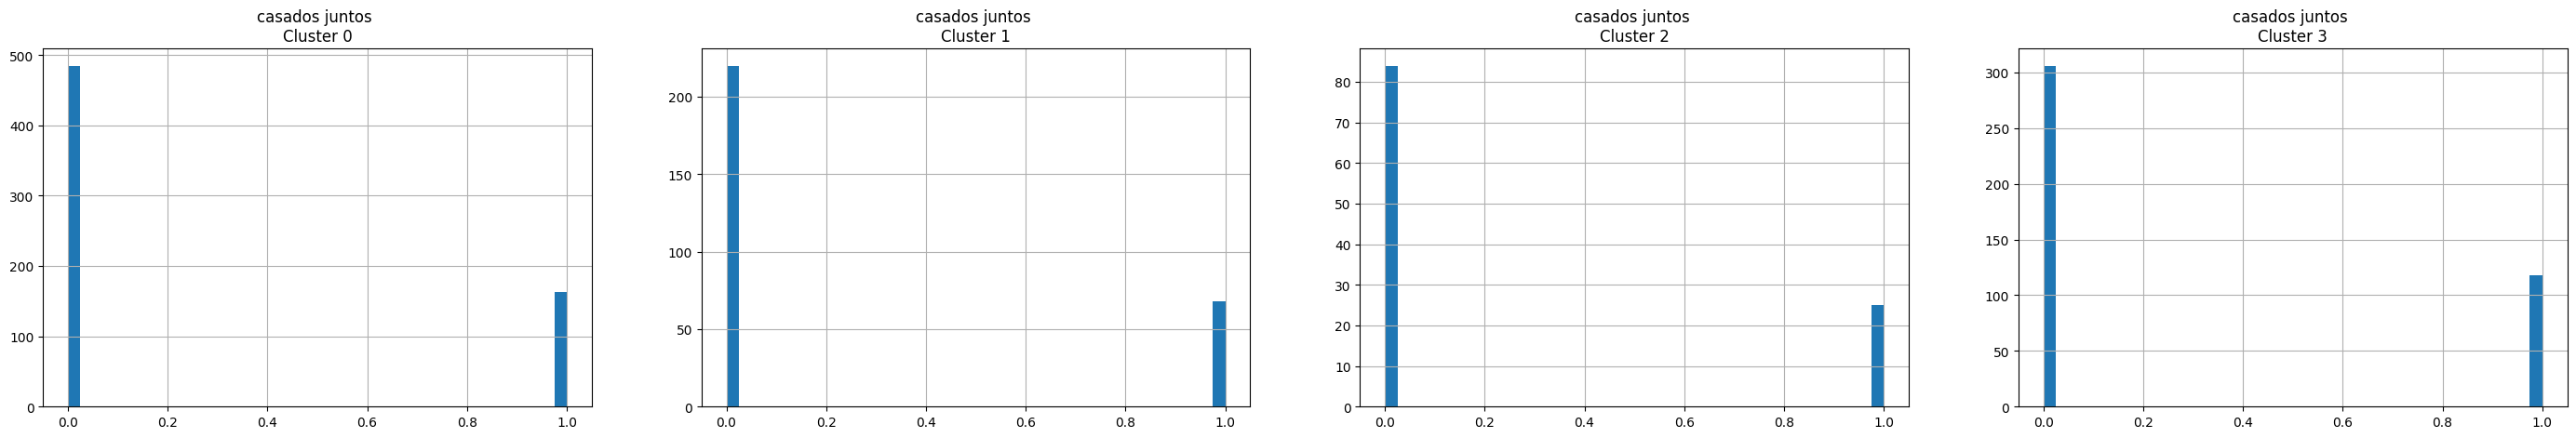

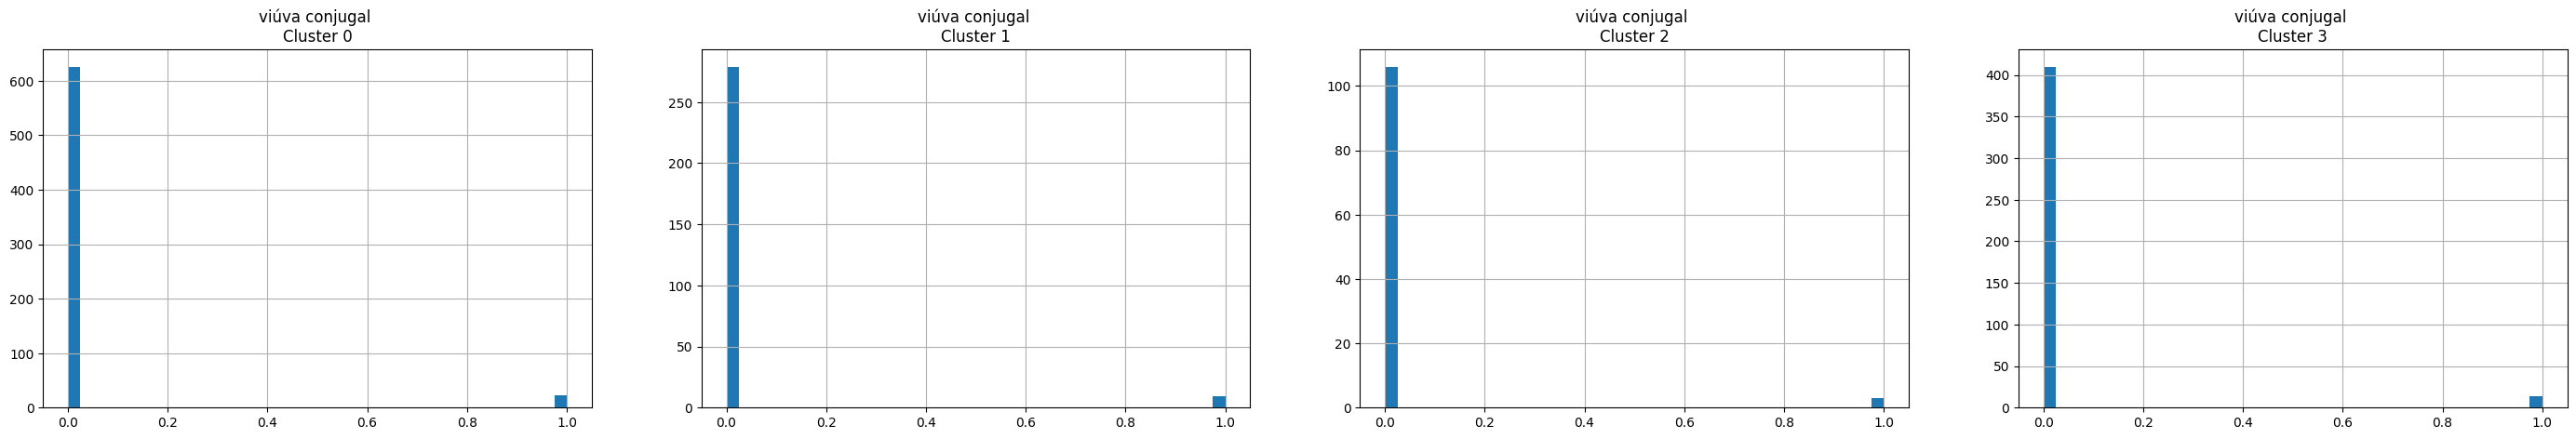

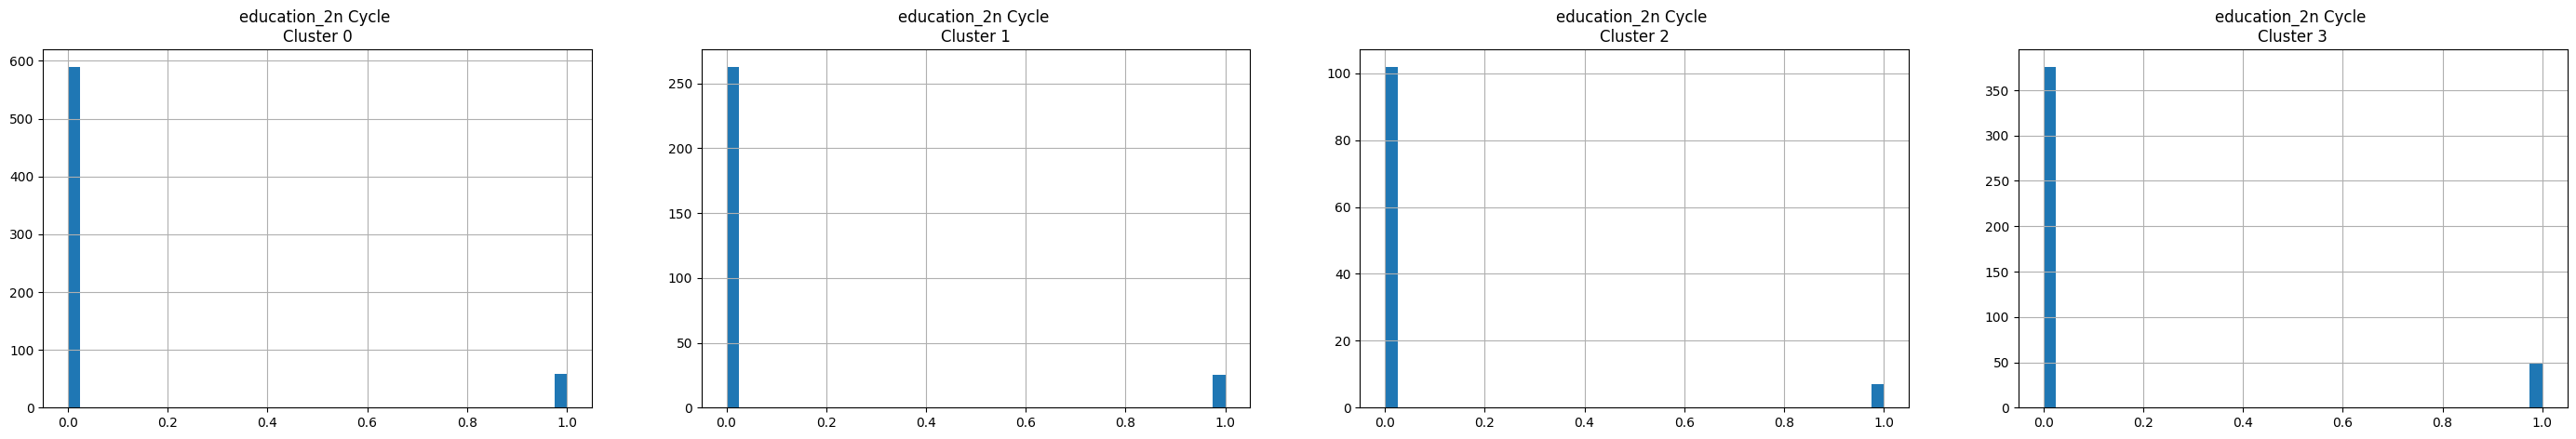

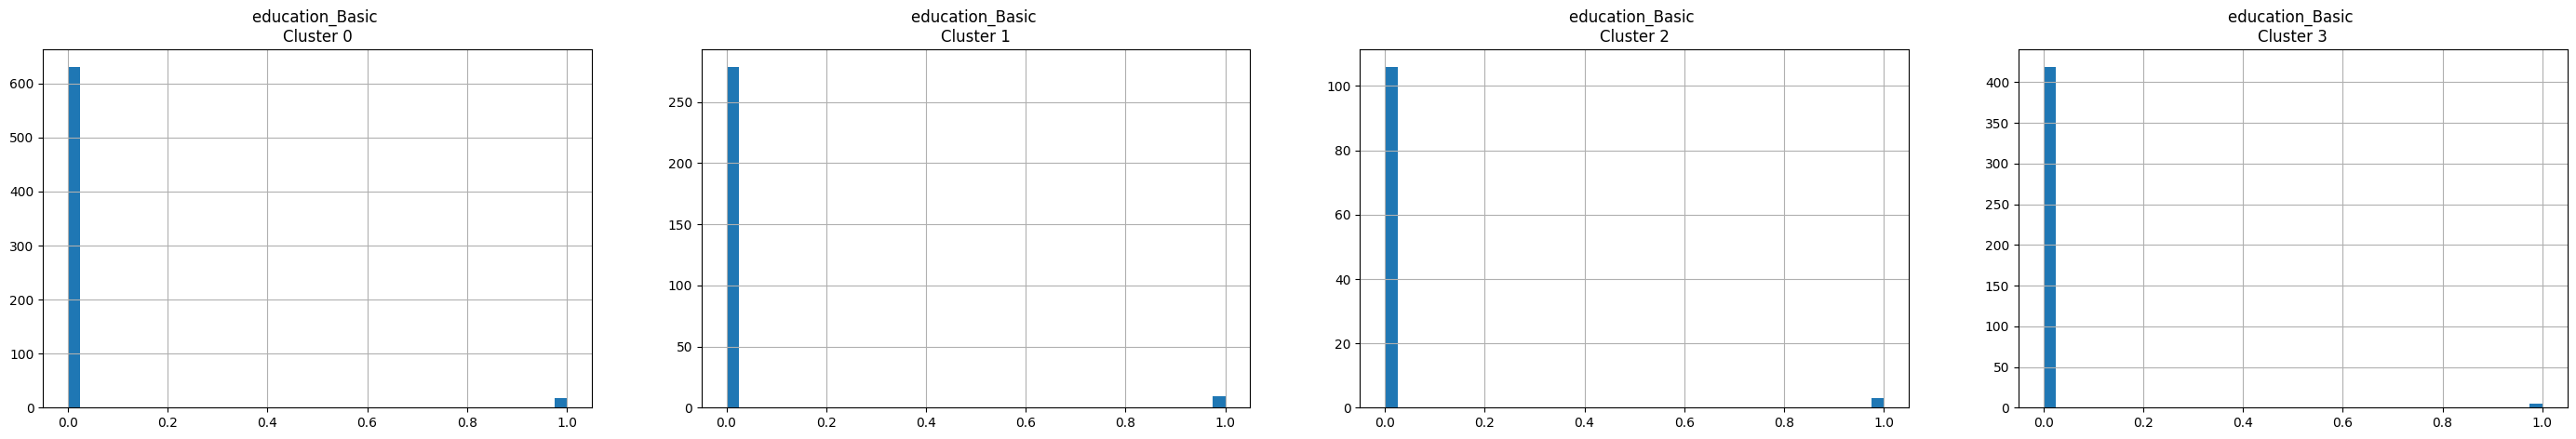

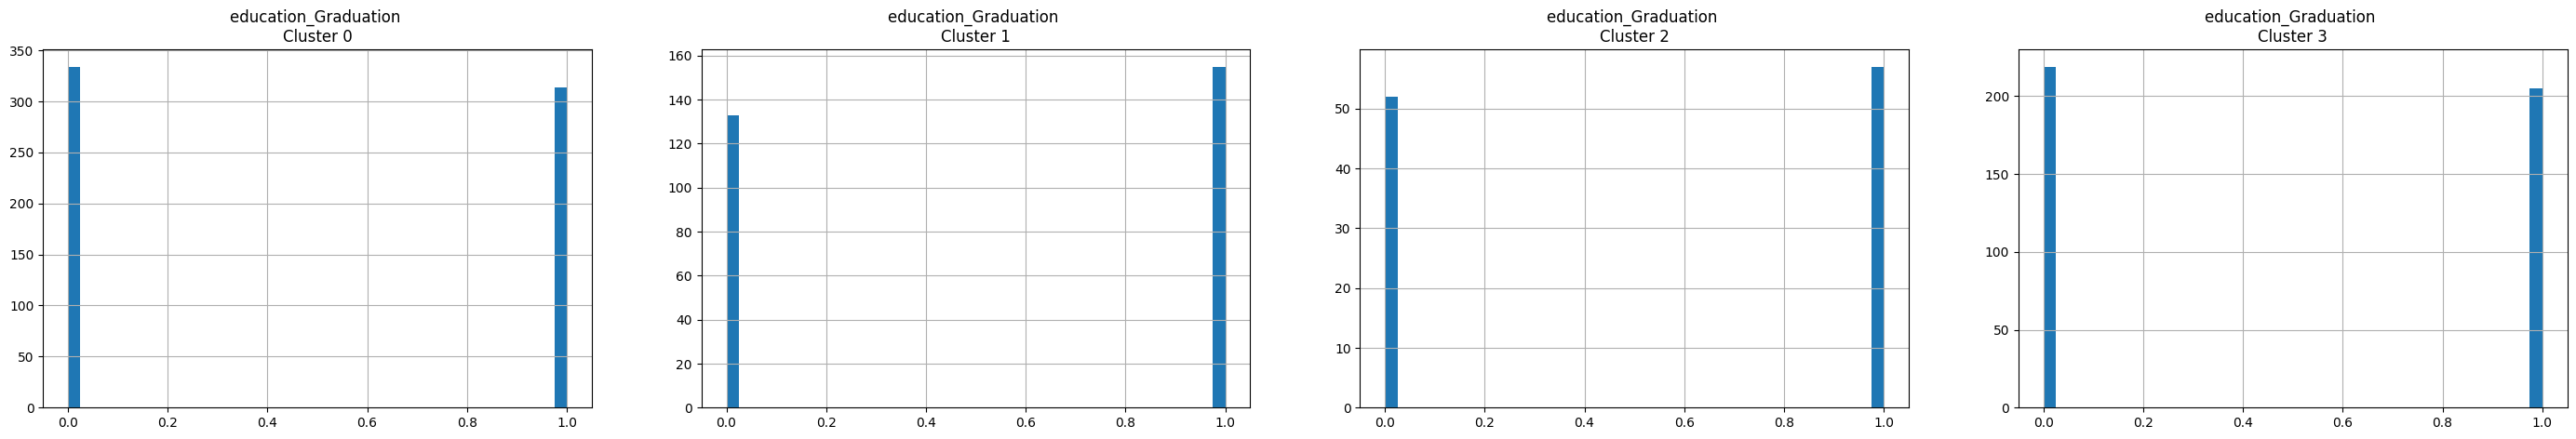

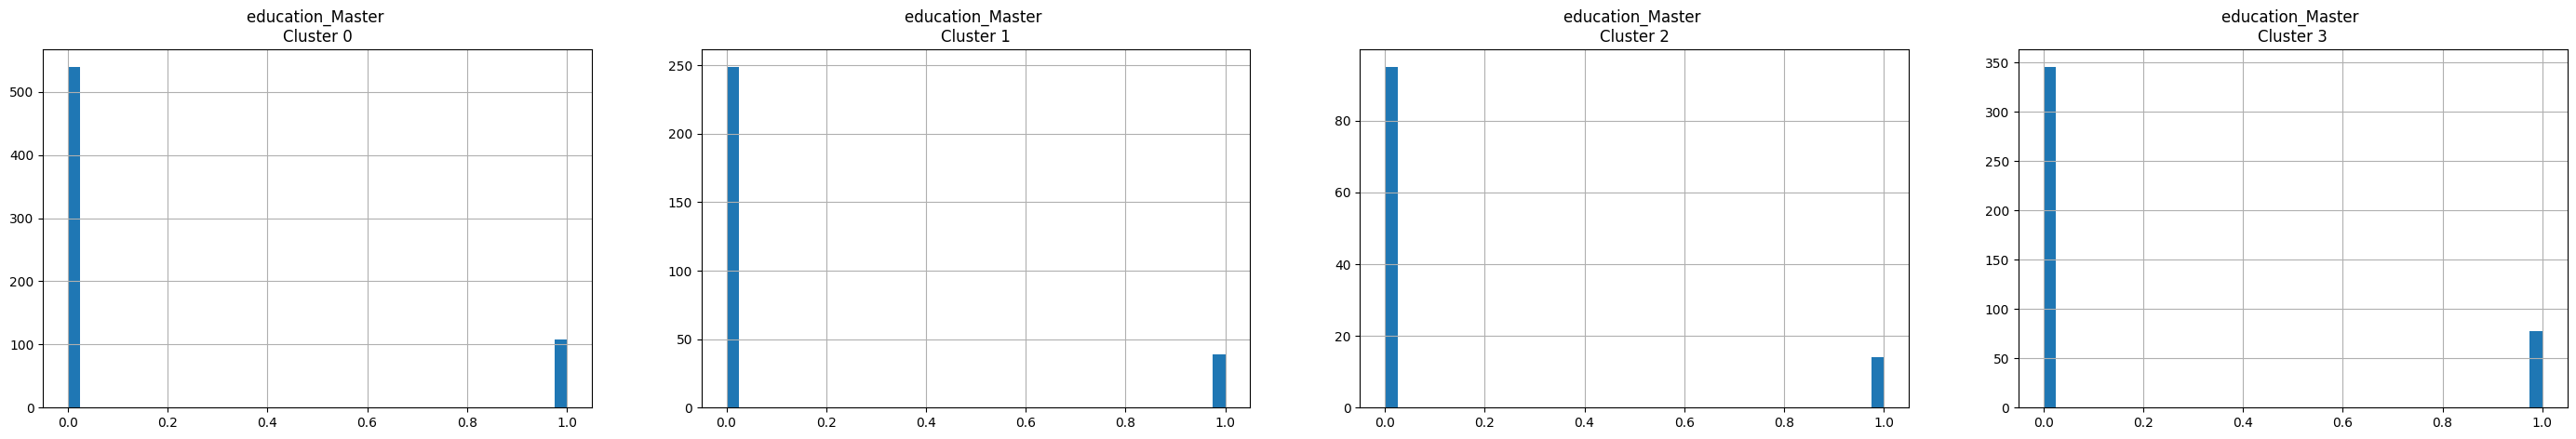

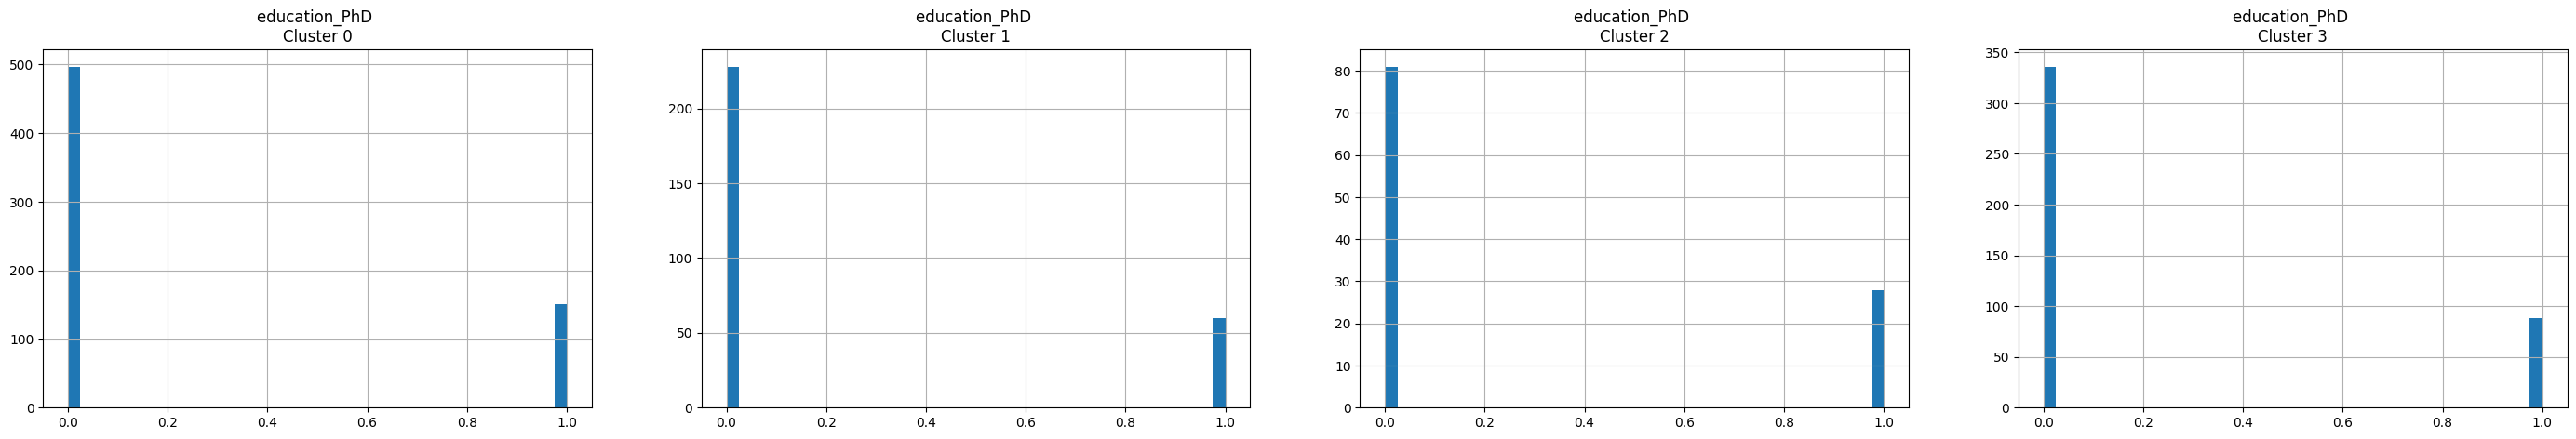

In [33]:
for i in ifood_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(4):
    plt.subplot(1, 4, j + 1)
    cluster =  ifood_df_cluster[ifood_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 40)
    plt.title('{} \nCluster {}'.format(i, j))

In [34]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 0]
fcluster.describe()

,Renda_anual,N_criancas,N_adolescentes,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,...,marital_casado,marital_solteiro,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,cluster
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,...,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.0
mean,50976.726852,0.467593,0.500000,299.594136,24.867284,163.168210,34.493827,27.305556,41.586420,2.350309,...,0.376543,0.239198,0.251543,0.033951,0.089506,0.026235,0.484568,0.166667,0.233025,0.0
std,20494.347410,0.552246,0.561517,336.906754,37.330401,226.526683,52.131447,41.609384,47.014042,1.958408,...,0.484893,0.426923,0.434235,0.181242,0.285693,0.159956,0.500148,0.372966,0.423084,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,35647.500000,0.000000,0.000000,23.000000,1.750000,17.000000,2.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,50360.500000,0.000000,0.000000,171.500000,8.000000,65.000000,12.000000,8.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,66766.000000,1.000000,1.000000,492.500000,32.000000,205.250000,41.000000,35.000000,54.250000,3.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,102692.000000,2.000000,2.000000,1459.000000,190.000000,1725.000000,258.000000,198.000000,262.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [35]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 1]
fcluster.describe()

,Renda_anual,N_criancas,N_adolescentes,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,...,marital_casado,marital_solteiro,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,cluster
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.0
mean,50195.076389,0.430556,0.524306,302.062500,28.868056,157.649306,39.038194,27.399306,42.888889,2.305556,...,0.409722,0.229167,0.236111,0.031250,0.086806,0.031250,0.538194,0.135417,0.208333,1.0
std,20810.007522,0.516660,0.559460,332.718027,42.803375,206.892940,57.132970,41.730389,47.285494,1.647626,...,0.492638,0.421028,0.425430,0.174295,0.282040,0.174295,0.499407,0.342764,0.406823,0.0
min,7500.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,33096.000000,0.000000,0.000000,18.000000,2.000000,15.750000,3.000000,2.000000,10.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,51153.000000,0.000000,0.000000,171.000000,9.000000,68.000000,11.000000,9.000000,28.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,66664.750000,1.000000,1.000000,513.250000,33.250000,217.000000,52.750000,32.000000,55.250000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,94871.000000,2.000000,2.000000,1449.000000,194.000000,946.000000,247.000000,194.000000,249.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [36]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 2]
fcluster.describe()

,Renda_anual,N_criancas,N_adolescentes,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,...,marital_casado,marital_solteiro,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,cluster
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.0
mean,52025.201835,0.486239,0.513761,299.871560,24.238532,157.394495,38.651376,26.073394,44.137615,2.532110,...,0.431193,0.247706,0.229358,0.027523,0.064220,0.027523,0.522936,0.128440,0.256881,2.0
std,20533.594973,0.554688,0.571137,317.948403,39.255549,204.420818,53.873545,41.444006,56.227130,2.263105,...,0.497530,0.433674,0.422362,0.164357,0.246277,0.164357,0.501781,0.336125,0.438931,0.0
min,7500.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,36130.000000,0.000000,0.000000,23.000000,1.000000,13.000000,2.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,54072.000000,0.000000,0.000000,189.000000,7.000000,79.000000,11.000000,8.000000,20.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.0
75%,67433.000000,1.000000,1.000000,490.000000,26.000000,207.000000,60.000000,32.000000,48.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.0
max,92910.000000,2.000000,2.000000,1248.000000,197.000000,951.000000,220.000000,189.000000,246.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [37]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 3]
fcluster.describe()

,Renda_anual,N_criancas,N_adolescentes,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,...,marital_casado,marital_solteiro,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,cluster
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.0
mean,53404.464623,0.424528,0.521226,315.693396,25.771226,176.120283,39.775943,28.641509,44.785377,2.301887,...,0.375000,0.179245,0.278302,0.033019,0.113208,0.011792,0.483491,0.183962,0.207547,3.0
std,20197.848277,0.531702,0.541011,334.848401,39.883127,223.324901,57.749801,43.773690,54.922242,1.803175,...,0.484695,0.384011,0.448692,0.178897,0.317221,0.108078,0.500318,0.387911,0.406030,0.0
min,7144.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,38630.500000,0.000000,0.000000,32.500000,1.000000,18.000000,3.000000,2.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,52192.500000,0.000000,0.500000,195.500000,7.500000,71.000000,11.500000,9.000000,23.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
75%,70202.250000,1.000000,1.000000,499.000000,30.500000,250.500000,50.000000,35.000000,57.250000,3.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.0
max,105471.000000,2.000000,2.000000,1493.000000,189.000000,974.000000,259.000000,197.000000,291.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0


Conclusão:

- Grupo 0: 
- Grupo 1: Possuem o maior indece de gastos com Frutas
- Grupo 2: Possuem maior indece de filhos, faz mais compras quando se tem descoto
- Grupo 3: Possuem o indice de renda_anual comparado aos outros, assim como o maior indece de gastos com carne, peixe, doce


# 05 - Aplicação de PCA (principal component analysis) e visualização dos resultados

In [42]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(ifood_df_scaled)
principal_comp

array([[ 3.58153839, -1.12665136],
       [-2.26272308, -0.32773342],
       [ 1.79566675, -0.43830421],
       ...,
       [ 1.55784462,  0.15931186],
       [ 1.89463997,  1.3907133 ],
       [-1.89791214,  1.90228396]])

In [43]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,3.581538,-1.126651
1,-2.262723,-0.327733
2,1.795667,-0.438304
3,-2.559595,-1.591804
4,-0.429071,0.394555


In [46]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,3.581538,-1.126651,1
1,-2.262723,-0.327733,0
2,1.795667,-0.438304,1
3,-2.559595,-1.591804,0
4,-0.429071,0.394555,3


In [47]:
pca_df.shape

(1808, 3)

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

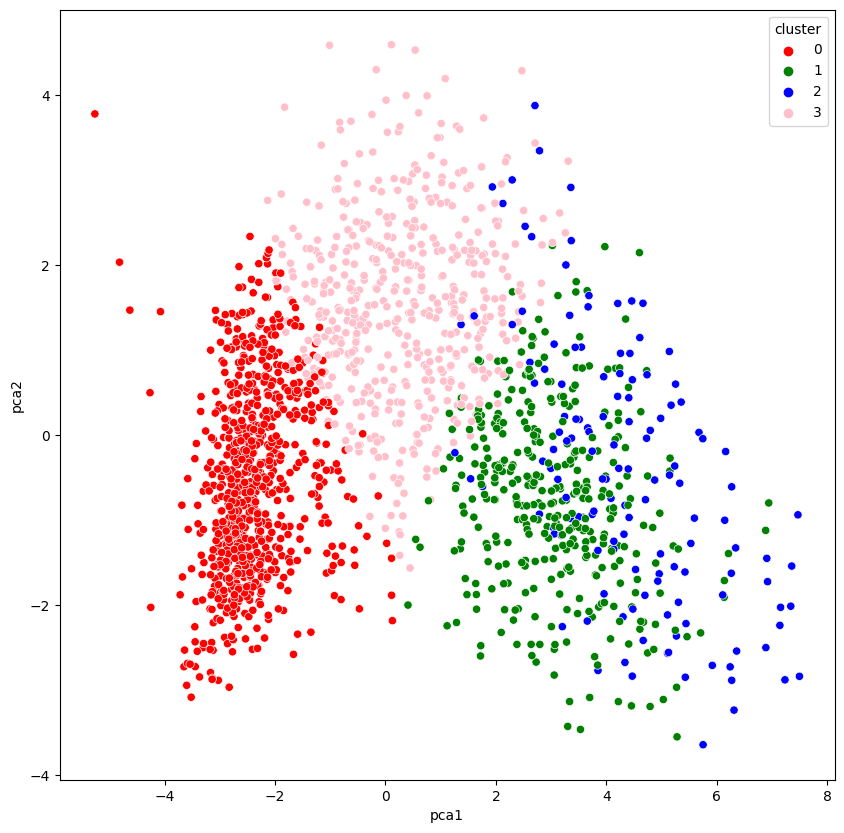

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])